# Female Naive Vs Female CPH
1. Female CPH (baseline)
2. Female CPH (Week 7)

In [1]:
import os
import sys
sys.path.append("C:\\Users\\"+os.getlogin()+"\\OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey\\PainClassifier")
from my_data_generator import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
import h5py
import warnings
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from datetime import datetime
import scipy as sp
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import auc, roc_curve
from itertools import cycle
from sklearn.metrics import RocCurveDisplay
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Conv3D, MaxPooling3D, Flatten, Dropout, GlobalAveragePooling3D, concatenate, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
from tensorflow.keras.applications.vgg16 import VGG16
from keras.regularizers import l2
import cv2
from keras import initializers
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
import tensorflow as tf
from keras import losses
from tensorflow.keras.optimizers import SGD
import wandb
from wandb.integration.keras import WandbCallback
import gc
#from numba import cuda
from tensorflow.keras.optimizers.schedules import ExponentialDecay

In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("Devices:", tf.config.list_physical_devices())


Num GPUs Available:  1
Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Model

In [4]:
def VGG16_3D(blocks):
        
    inputs = Input(shape=(42, 65, 29), name='input_layer')
    x = Reshape(target_shape=[42, 65, 29, 1], name='input_x_3d_volumes')(inputs)

    if blocks == 1:
        print("entra al 1")
        #batch_norm
        x = BatchNormalization()(x)
        # 1st Conv Block
        x = Conv3D(filters =64, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = Conv3D(filters =64, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = MaxPooling3D(pool_size =2, strides =2, padding ='same')(x)
        x = tf.keras.layers.GlobalAveragePooling3D()(x)
        x = tf.keras.layers.Dropout(0.5)(x)
        
    elif blocks == 2:
        print("entra al 2")
        #batch_norm
        x = BatchNormalization()(x)
        # 1st Conv Block
        x = Conv3D(filters =64, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = Conv3D(filters =64, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = MaxPooling3D(pool_size =2, strides =2, padding ='same')(x)
        x = tf.keras.layers.Dropout(0.2)(x)
            
        #batch_norm
        x = BatchNormalization()(x)
        # 2nd Conv Block
        x = Conv3D (filters =128, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = Conv3D (filters =128, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = MaxPooling3D(pool_size =2, strides =2, padding ='same')(x)
        x = tf.keras.layers.GlobalAveragePooling3D()(x)
        x = tf.keras.layers.Dropout(0.5)(x)
        
    elif blocks == 3:
        print("entra al 3")
        #batch_norm
        x = BatchNormalization()(x)
        # 1st Conv Block
        x = Conv3D(filters =64, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = Conv3D(filters =64, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = MaxPooling3D(pool_size =2, strides =2, padding ='same')(x)
        x = tf.keras.layers.Dropout(0.2)(x)
            
        #batch_norm
        x = BatchNormalization()(x)
        # 2nd Conv Block
        x = Conv3D (filters =128, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = Conv3D (filters =128, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = MaxPooling3D(pool_size =2, strides =2, padding ='same')(x)
        x = tf.keras.layers.Dropout(0.2)(x)
        
        #batch_norm
        x = BatchNormalization()(x)
        # 3rd Conv block  
        x = Conv3D (filters =256, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x) 
        x = Conv3D (filters =256, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x) 
        x = Conv3D (filters =256, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x) 
        x = MaxPooling3D(pool_size =2, strides =2, padding ='same')(x)
        x = tf.keras.layers.GlobalAveragePooling3D()(x)
        x = tf.keras.layers.Dropout(0.5)(x)
        
    elif blocks == 4:
        print("entra al 4")
        #batch_norm
        x = BatchNormalization()(x)
        # 1st Conv Block
        x = Conv3D(filters =64, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = Conv3D(filters =64, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = MaxPooling3D(pool_size =2, strides =2, padding ='same')(x)
        x = tf.keras.layers.Dropout(0.2)(x)
            
        #batch_norm
        x = BatchNormalization()(x)
        # 2nd Conv Block
        x = Conv3D (filters =128, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = Conv3D (filters =128, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        #x = MaxPooling3D(pool_size =2, strides =2, padding ='same')(x)
        x = tf.keras.layers.Dropout(0.2)(x)
        
        #batch_norm
        x = BatchNormalization()(x)
        # 3rd Conv block  
        x = Conv3D (filters =256, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x) 
        x = Conv3D (filters =256, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x) 
        x = Conv3D (filters =256, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x) 
        #x = MaxPooling3D(pool_size =2, strides =2, padding ='same')(x)
        x = tf.keras.layers.Dropout(0.2)(x)
        
        #batch_norm
        x = BatchNormalization()(x)
        # 4th Conv block
        x = Conv3D (filters =512, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = Conv3D (filters =512, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = Conv3D (filters =512, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = MaxPooling3D(pool_size =2, strides =2, padding ='same')(x)
        #x = tf.keras.layers.GlobalAveragePooling3D()(x)
        x = tf.keras.layers.Dropout(0.5)(x)

    elif blocks == 5:
        print("entra al 5")
        #batch_norm
        x = BatchNormalization()(x)
        # 1st Conv Block
        x = Conv3D(filters =64, kernel_size =3, padding ='same', activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=0.05))(x)
        x = Conv3D(filters =64, kernel_size =3, padding ='same', activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=0.05))(x)
        #x = MaxPooling3D(pool_size =2, strides =2, padding ='same')(x)
        x = tf.keras.layers.Dropout(0.3)(x)
            
        #batch_norm
        x = BatchNormalization()(x)
        # 2nd Conv Block
        x = Conv3D (filters =128, kernel_size =3, padding ='same', activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=0.05))(x)
        x = Conv3D (filters =128, kernel_size =3, padding ='same', activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=0.05))(x)
        #x = MaxPooling3D(pool_size =2, strides =1, padding ='same')(x)
        x = tf.keras.layers.Dropout(0.3)(x)
        
        #batch_norm
        x = BatchNormalization()(x)
        # 3rd Conv block  
        x = Conv3D (filters =256, kernel_size =3, padding ='same', activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=0.05))(x) 
        x = Conv3D (filters =256, kernel_size =3, padding ='same', activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=0.05))(x) 
        x = Conv3D (filters =256, kernel_size =3, padding ='same', activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=0.05))(x) 
        #x = MaxPooling3D(pool_size =2, strides =1, padding ='same')(x)
        x = tf.keras.layers.Dropout(0.3)(x)
        
        #batch_norm
        x = BatchNormalization()(x)
        # 4th Conv block
        x = Conv3D (filters =512, kernel_size =3, padding ='same', activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=0.05))(x)
        x = Conv3D (filters =512, kernel_size =3, padding ='same', activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=0.05))(x)
        x = Conv3D (filters =512, kernel_size =3, padding ='same', activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=0.05))(x)
        #x = MaxPooling3D(pool_size =2, strides =1, padding ='same')(x)
        x = tf.keras.layers.Dropout(0.3)(x)
    
        #batch_norm
        x = BatchNormalization()(x)
        # 5th Conv block
        x = Conv3D (filters =512, kernel_size =3, padding ='same', activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=0.05))(x)
        x = Conv3D (filters =512, kernel_size =3, padding ='same', activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=0.05))(x)
        x = Conv3D (filters =512, kernel_size =3, padding ='same', activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=0.05))(x)
        #x = MaxPooling3D(pool_size =2, strides =2, padding ='same')(x)
        x = tf.keras.layers.GlobalAveragePooling3D()(x)
        x = tf.keras.layers.Dropout(0.5)(x)
    
    # Fully connected layers  
    x = Flatten()(x) 
    x = Dense(units = 4096, activation ='relu',kernel_regularizer='l2')(x)
    #x = tf.keras.layers.Dropout(0.5)(x)
    x = Dense(units = 4096, activation ='relu',kernel_regularizer='l2')(x) 
    x = tf.keras.layers.Dropout(0.5)(x)
    output = Dense(units = 2,activation ='sigmoid',kernel_regularizer='l2')(x)
    
    # creating the model
    VGG_3d_model = Model (inputs=inputs, outputs =output)
    #model.summary()

    return VGG_3d_model

def set_pretrained_weigths(VGG_3d_model):
    #VGG 16 with weights from Imagenet
    pretrained_model = tf.keras.applications.VGG16(
        include_top=False,
        weights="imagenet",
        pooling='avg',
        input_shape = (42, 65, 3)
    )
    
    #conv layers on VGG_3d_model
    layers_conv = []
    for j in range(len(VGG_3d_model.layers)):
        if "conv3d" in str(VGG_3d_model.layers[j]):
            layers_conv.append(j)
    layers_conv_pretrained = []
    for j in range(len(pretrained_model.layers)):
        if "Conv2D" in str(pretrained_model.layers[j]):
            layers_conv_pretrained.append(j)
    
    for i in range(len(layers_conv)):
        if "Conv2D" in str(pretrained_model.layers[layers_conv_pretrained[i]]):
            if i == 0:
                w = pretrained_model.layers[layers_conv_pretrained[i]].get_weights()[0].sum(axis=2, keepdims=True)
            else:
                w = pretrained_model.layers[layers_conv_pretrained[i]].get_weights()[0]
                
            w3d=[]
            
            w = np.reshape(w,(3,3,-1),order='F')
            for j in range(len(w[0,0,:])):
                for k in range(3):
                    w3d.append(w[:,:,j])
            w3d = np.transpose(w3d, (1,2,0))
            
            new_weights = np.reshape(w3d, np.array(VGG_3d_model.layers[layers_conv[i]].get_weights()[0]).shape,order='F')
            new_bias = pretrained_model.layers[layers_conv_pretrained[i]].get_weights()[1]
            
            WnB = []
            WnB.append(new_weights)
            WnB.append(new_bias)
    
            VGG_3d_model.layers[layers_conv[i]].set_weights(WnB)

    del pretrained_model, w, WnB, new_weights, new_bias, w3d

# Metrics

In [5]:
def confusionmatrix_multiclass(y_test,pred):
    cm = confusion_matrix(y_test, (np.rint(preds)).astype(int) )
    group_names = ['True baseline','False Baseline','False Baseline',   
                   'False week 1','Truec','False Week 1',
                  'False week 7','False week 7','True week 7']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         np.ndarray.flatten(cm/(np.sum(cm,axis=1).reshape(3,1)))]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(3,3)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', xticklabels = ['Baseline','Week 1','Week 7'] ,yticklabels = ['Baseline','Week 1','Week 7'])
    plt.show()

def confusionmatrix(y_test,preds):
    #Construct the Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    group_names = ['True Naive','False Naive','False CPH','True CPH']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         np.ndarray.flatten(cm/(np.sum(cm,axis=1).reshape(2,1)))]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', xticklabels = ['MALE','FEMALE'] ,yticklabels = ['MALE','FEMALE'])
    plt.show()
    return sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', xticklabels = ['MALE','FEMALE'] ,yticklabels = ['MALE','FEMALE'])
    
def confusionmatrix_binary(y_test, preds):
    cm = confusion_matrix(y_test, preds)
    group_names = ['True baseline','False baseline','False Week 1','True Week 1']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         np.ndarray.flatten(cm/(np.sum(cm,axis=1).reshape(2,1)))]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', xticklabels = ['MALE','FEMALE'] ,yticklabels = ['MALE','FEMALE'])
    plt.show()

def ROC(probs,y_test): #binary
    #Classification Area under curve
     warnings.filterwarnings('ignore')
             
     auc = roc_auc_score(y_test, probs)
     print('AUC - Test Set: %.2f%%' % (auc*100))
    
     # calculate roc curve
     fpr, tpr, thresholds = roc_curve(y_test, probs)
     # plot no skill
     plt.plot([0, 1], [0, 1], linestyle='--')
     # plot the roc curve for the model
     plt.plot(fpr, tpr, marker='.')
     plt.xlabel('False positive rate')
     plt.ylabel('Sensitivity/ Recall')
     # show the plot
     plt.show()
    
     probs = (np.rint(probs)).astype(int)   
        
     precision = precision_score(y_test, probs)
     print('Precision: %f' % precision)
     # recall: tp / (tp + fn)
     recall = recall_score(y_test, probs)
     print('Recall: %f' % recall)
     # f1: tp / (tp + fp + fn)
     f1 = f1_score(y_test, probs)
     print('F1 score: %f' % f1)
        
def ROC_multiclass(model, y_test, n_class):
    #y_test: array size (# of subjects, ) with classes 
    #pretrained model to be evaluated 
    
    label_binarizer = LabelBinarizer().fit(y_test)
    y_onehot_test = label_binarizer.transform(y_test)
    y_onehot_test.shape  # (n_samples, n_classes)

    y_score = model.predict(X_test) # y_score is onehot
    
    # store the fpr, tpr, and roc_auc for all averaging strategies
    fpr, tpr, roc_auc = dict(), dict(), dict()
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")
    
    n_classes = n_class
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr_grid = np.linspace(0.0, 1.0, 1000)

    # Interpolate all ROC curves at these points
    mean_tpr = np.zeros_like(fpr_grid)

    for i in range(n_classes):
        mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

    # Average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = fpr_grid
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")
    
    target_names = ['Naive','Week1','Week7']

    fig, ax = plt.subplots(figsize=(6, 6))

    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for class_id, color in zip(range(n_classes), colors):
        RocCurveDisplay.from_predictions(
            y_onehot_test[:, class_id],
            y_score[:, class_id],
            name=f"ROC curve for {target_names[class_id]}",
            color=color,
            ax=ax,
            plot_chance_level=(class_id == 2),
        )

    _ = ax.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
    )
    
# plot diagnostic learning curves
def summarize_diagnostics(histories):
    c = ['b','g','r','c','m','y','k','w']
    ltr = ['fold 1(train)','fold 2(train)','fold 3(train)','fold 4(train)','fold 5(train)']
    lts = ['fold 1(val)','fold 2(val)','fold 3(val)','fold 4(val)','fold 5(val)']
    for i in range(len(histories)):
        # plot loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color=c[i], label=ltr[i], linestyle="-")
        plt.plot(histories[i].history['val_loss'], color=c[i], label=lts[i], linestyle="--")
        # plot accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['Accuracy'], color=c[i], label=ltr[i], linestyle="-")
        plt.plot(histories[i].history['val_Accuracy'], color=c[i], label=lts[i], linestyle="--")
    plt.legend()
    plt.show()

# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.show() 

# Just brain. Female. Naive vs CPH
1) Naive (CPH_BL)
2) CPH (CPH_W7)

In [6]:
#female = [49,50,51,52,65,66,77,78,79,80,81,82,83]
female = [49,50,51,52,65,66,77,78,79]
y_female = np.ones(len(female))

subjects = np.array(female)
labels = np.array(list(y_female))
sessions = [1,3]
MRI_type = "func"
functional_type = "rest"

In [7]:
wandb.login()

wandb: Currently logged in as: a01067716 (a01067716-tecnol-gico-de-monterrey) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

Run # 1


Accuracy,▁██
epoch,▁▅█
loss,█▅▁
val_Accuracy,▁▁▁
val_loss,█▅▁
Accuracy,0.5125
epoch,2
loss,63.04835
val_Accuracy,0.5
val_loss,62.21504


sub train:
['F:/rabies/preprocess_batch-001_rest/bold_datasink/commonspace_bold/_scan_info_subject_id051.session01_split_name_sub-051_ses-01_desc-o_T2w/_run_None/sub-051_ses-01_task-rest_desc-oa_bold_autobox_combined.nii.gz'
 'F:/rabies/preprocess_batch-002_rest/bold_datasink/commonspace_bold/_scan_info_subject_id079.session01_split_name_sub-079_ses-01_desc-o_T2w/_run_None/sub-079_ses-01_task-rest_desc-oa_bold_autobox_combined.nii.gz'
 'F:/rabies/preprocess_batch-001_rest/bold_datasink/commonspace_bold/_scan_info_subject_id052.session01_split_name_sub-052_ses-01_desc-o_T2w/_run_None/sub-052_ses-01_task-rest_desc-oa_bold_autobox_combined.nii.gz'
 'F:/rabies/preprocess_batch-001_rest/bold_datasink/commonspace_bold/_scan_info_subject_id049.session01_split_name_sub-049_ses-01_desc-o_T2w/_run_None/sub-049_ses-01_task-rest_desc-oa_bold_autobox_combined.nii.gz'
 'F:/rabies/preprocess_batch-001_rest/bold_datasink/commonspace_bold/_scan_info_subject_id051.session03_split_name_sub-051_ses-03_des

INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\serene-morning-6\assets


INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\serene-morning-6\assets


40/40 [==============================] - 567s 14s/step - loss: 66.1939 - Accuracy: 0.5317 - val_loss: 65.5126 - val_Accuracy: 0.0000e+00 - combine_metric: 0.0000e+00
Epoch 2/3
40/40 [==============================] - ETA: 0s - loss: 64.8609 - Accuracy: 0.5200 

INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\serene-morning-6\assets


INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\serene-morning-6\assets


40/40 [==============================] - 531s 13s/step - loss: 64.8609 - Accuracy: 0.5200 - val_loss: 64.1524 - val_Accuracy: 0.2500 - combine_metric: 0.0039
Epoch 3/3
40/40 [==============================] - ETA: 0s - loss: 63.4583 - Accuracy: 0.5433 

INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\serene-morning-6\assets


INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\serene-morning-6\assets


40/40 [==============================] - 610s 15s/step - loss: 63.4583 - Accuracy: 0.5433 - val_loss: 62.7239 - val_Accuracy: 0.7654 - combine_metric: 0.0122
Duration (CNN): 0:28:50.032135
Evaluating best epoch
30/30 [==============================] - 39s 1s/step - loss: 62.7238 - Accuracy: 0.7400
predicts CNN
30/30 [==============================] - 40s 1s/step
mislabeled subjects:
 Counter({'F:/rabies/preprocess_batch-001_rest/bold_datasink/commonspace_bold/_scan_info_subject_id066.session01_split_name_sub-066_ses-01_desc-o_T2w/_run_None/sub-066_ses-01_task-rest_desc-oa_bold_autobox_combined.nii.gz': 150, 'F:/rabies/preprocess_batch-001_rest/bold_datasink/commonspace_bold/_scan_info_subject_id050.session01_split_name_sub-050_ses-01_desc-o_T2w/_run_None/sub-050_ses-01_task-rest_desc-oa_bold_autobox_combined.nii.gz': 83, 'F:/rabies/preprocess_batch-001_rest/bold_datasink/commonspace_bold/_scan_info_subject_id065.session01_split_name_sub-065_ses-01_desc-o_T2w/_run_None/sub-065_ses-01_ta

c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\my_data_generator.py:1032: RuntimeWarning: invalid value encountered in cast
  upscaled_heatmap = np.uint8(255 * heatmap)


GradCam All ConvLayers


c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\my_data_generator.py:1032: RuntimeWarning: invalid value encountered in cast
  upscaled_heatmap = np.uint8(255 * heatmap)


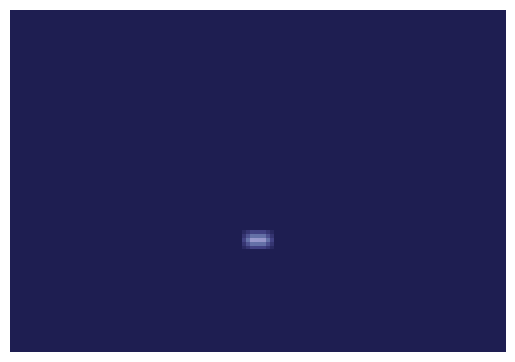

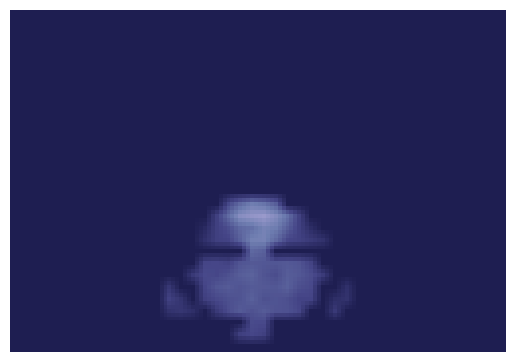

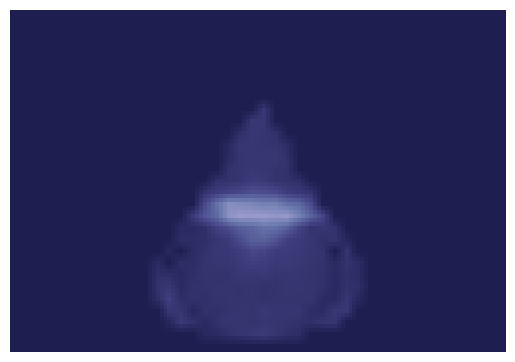

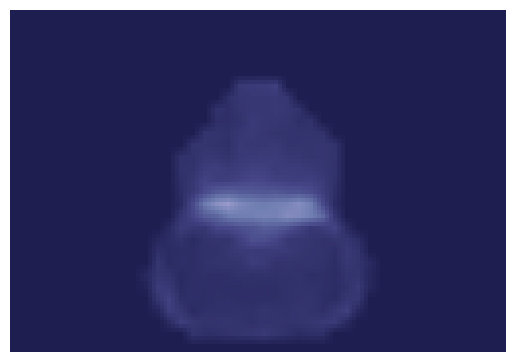

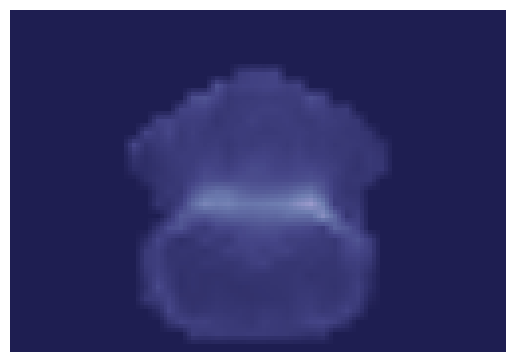

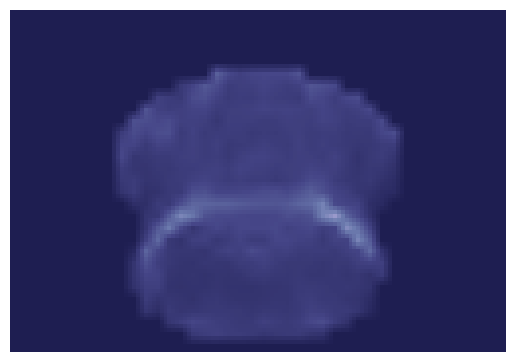

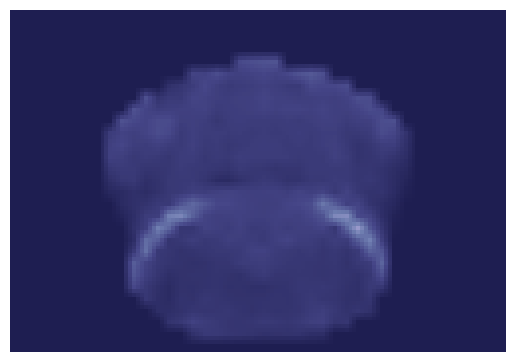

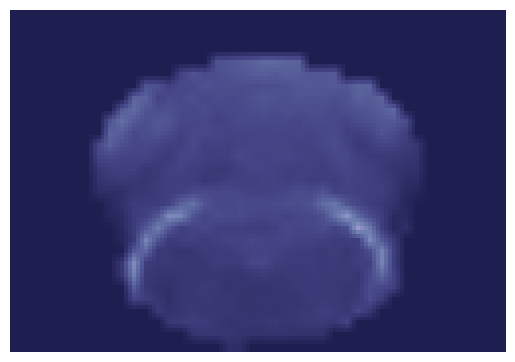

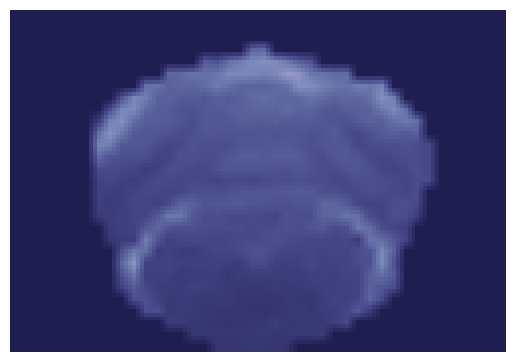

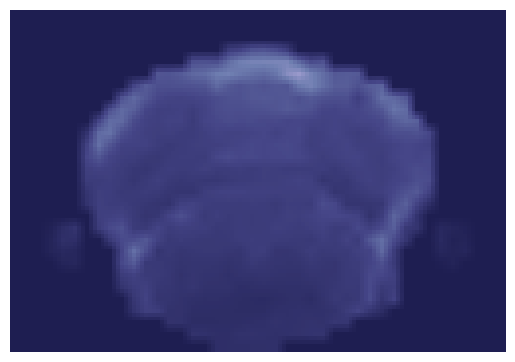

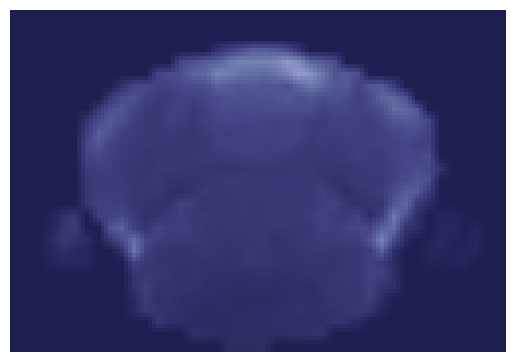

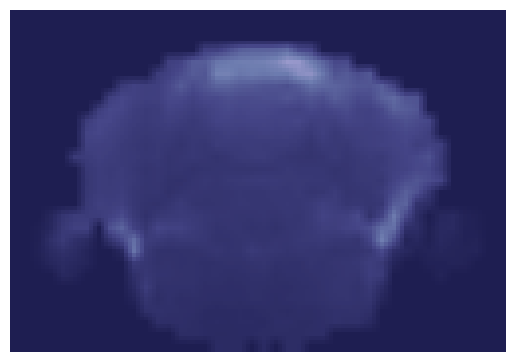

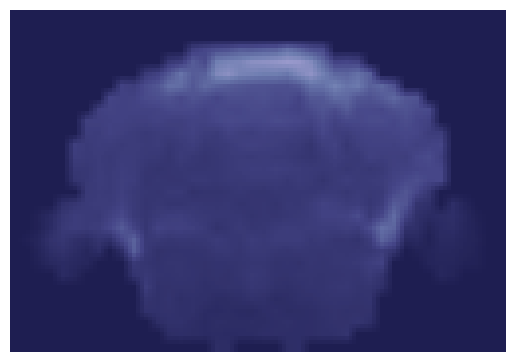

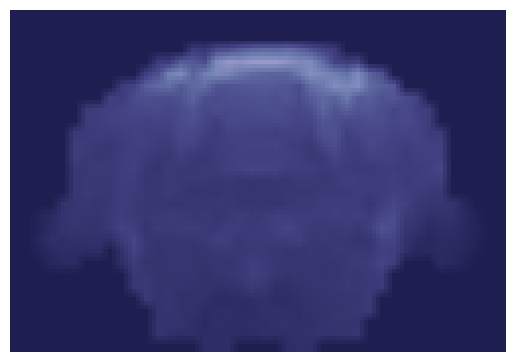

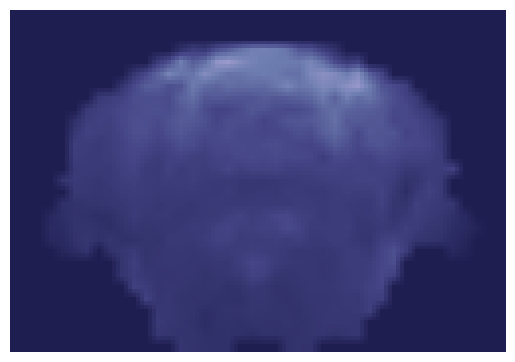

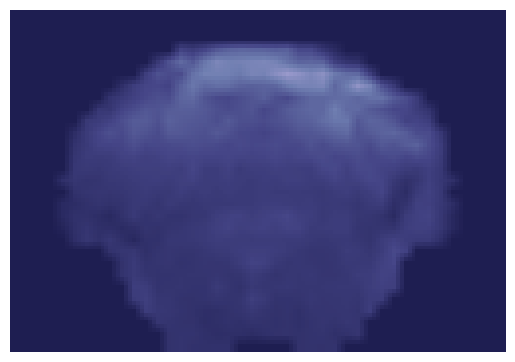

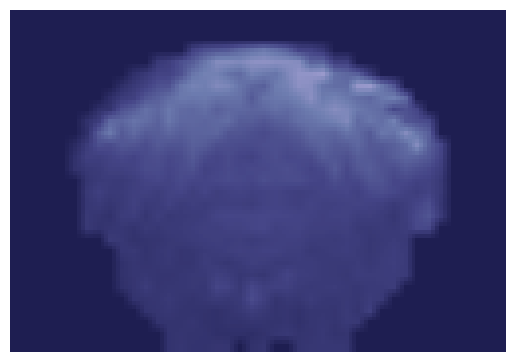

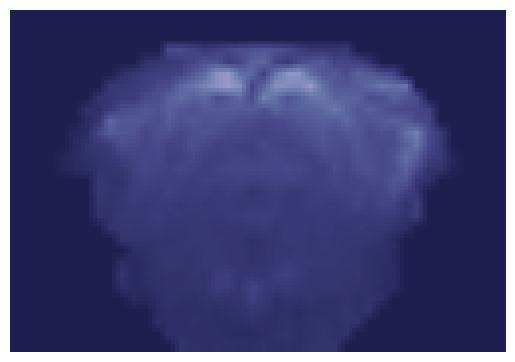

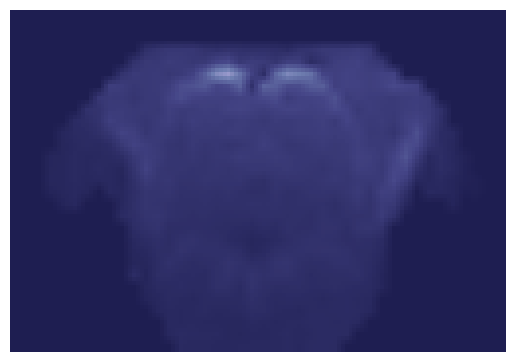

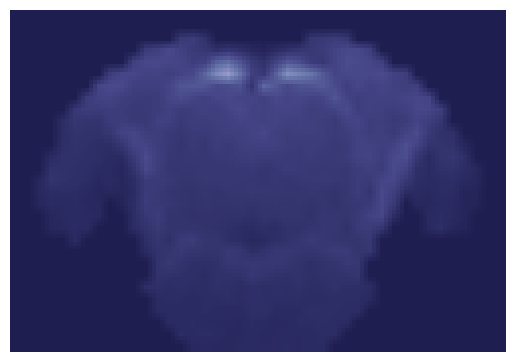

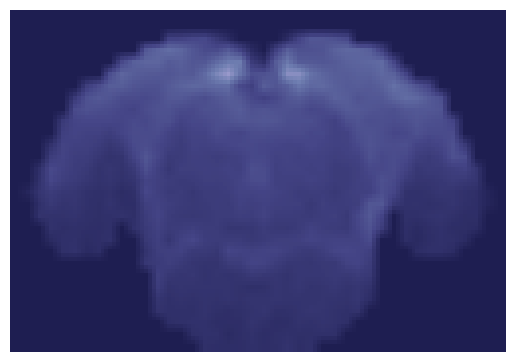

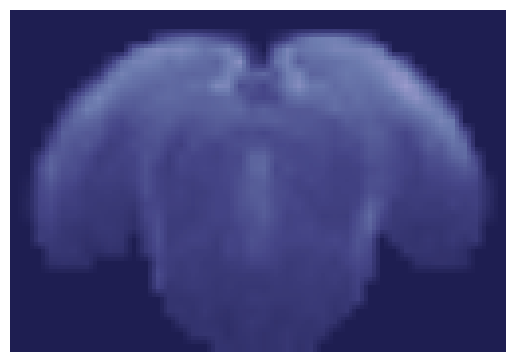

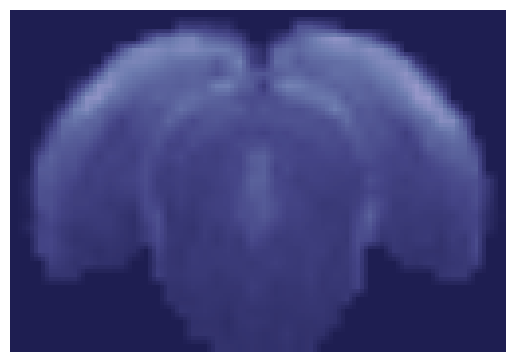

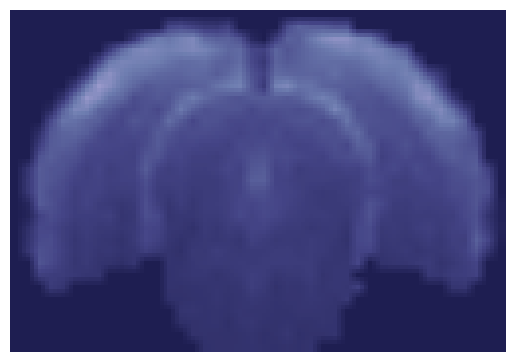

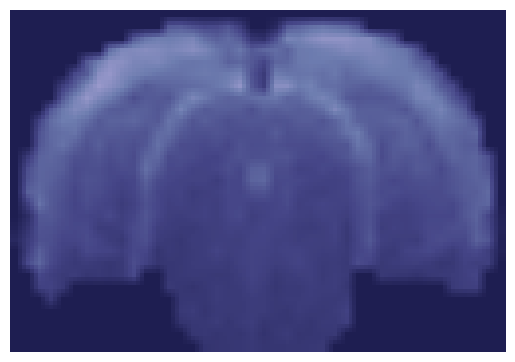

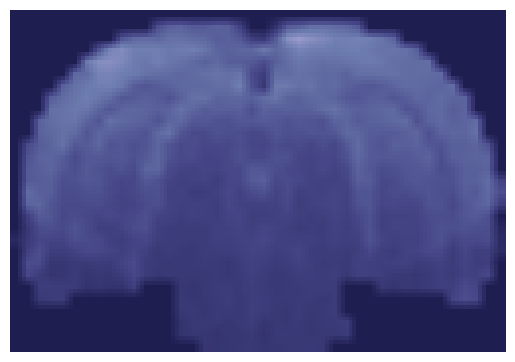

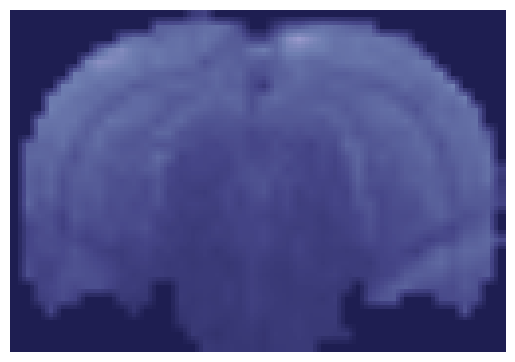

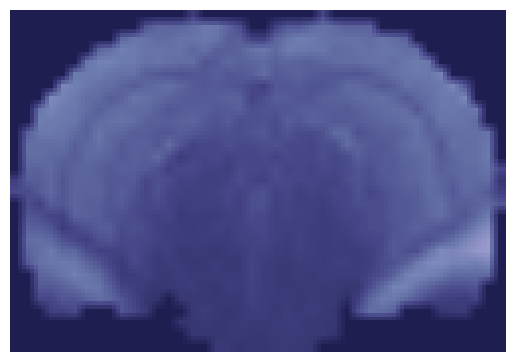

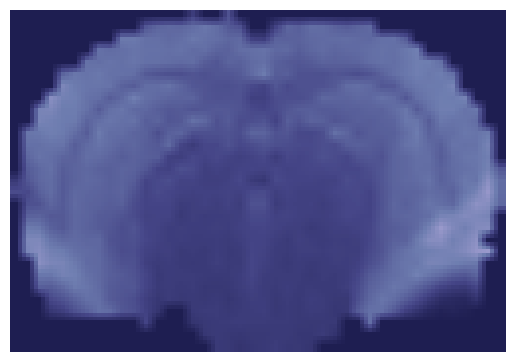

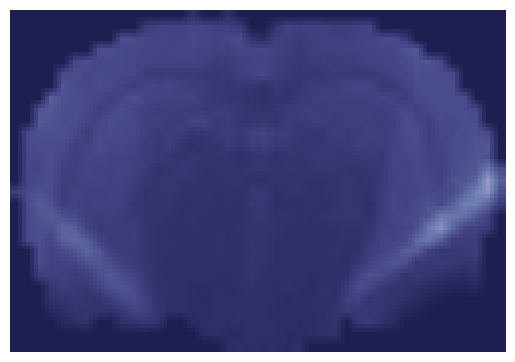

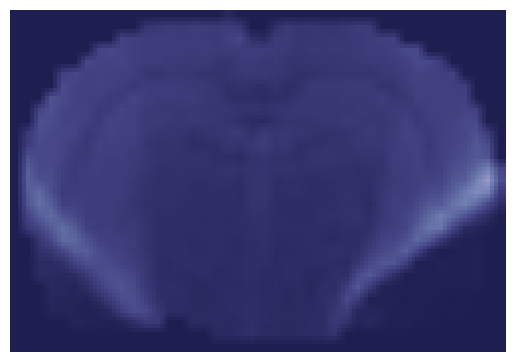

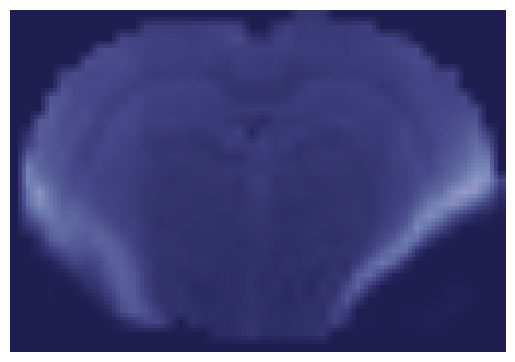

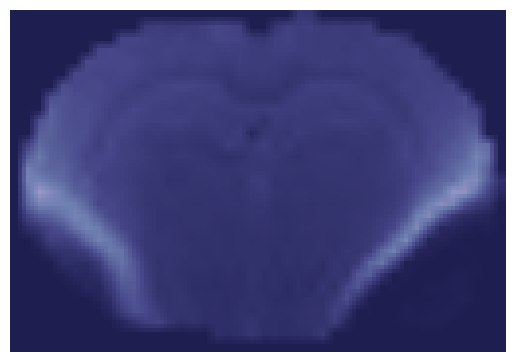

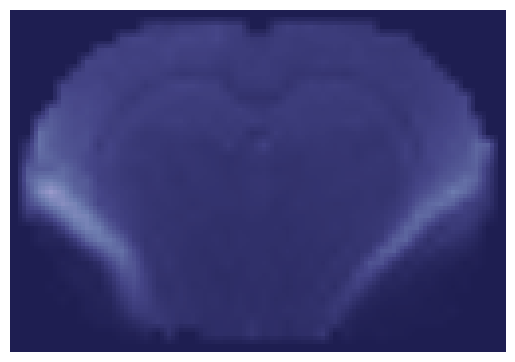

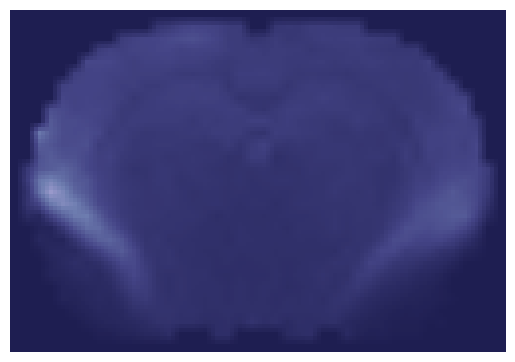

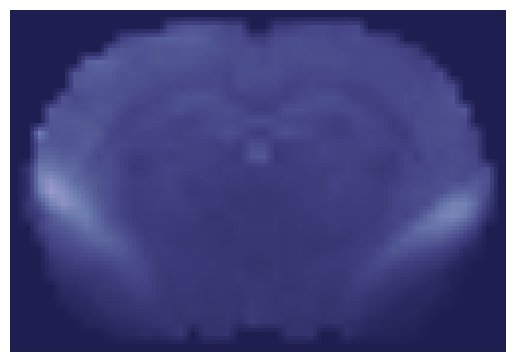

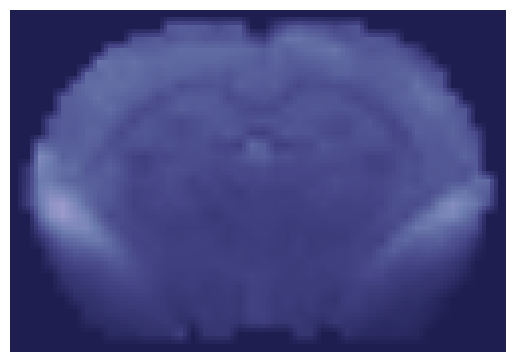

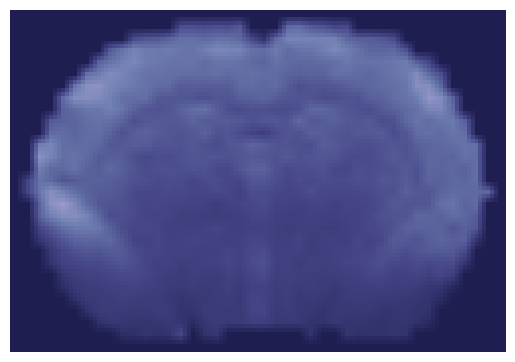

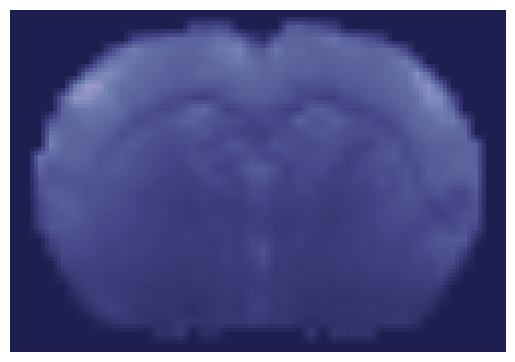

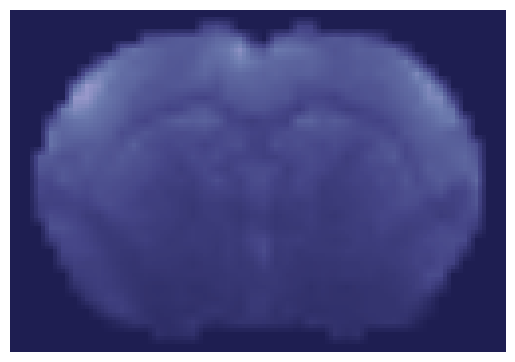

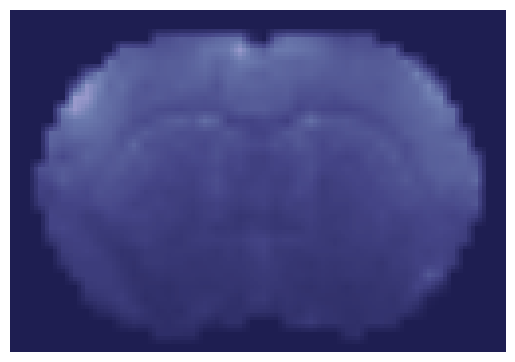

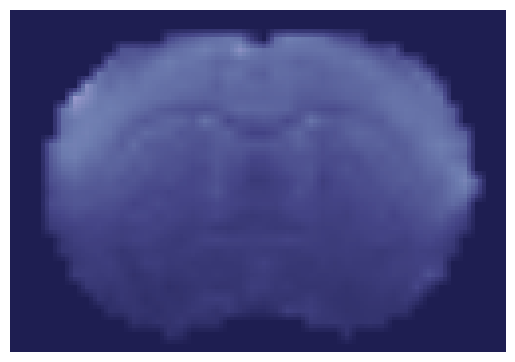

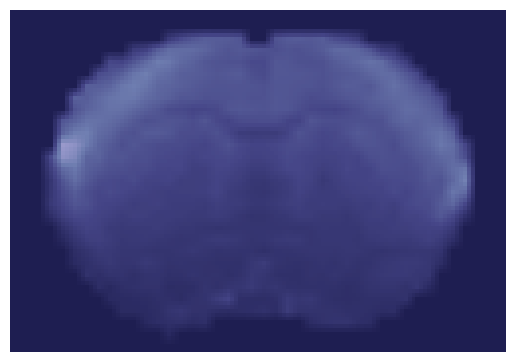

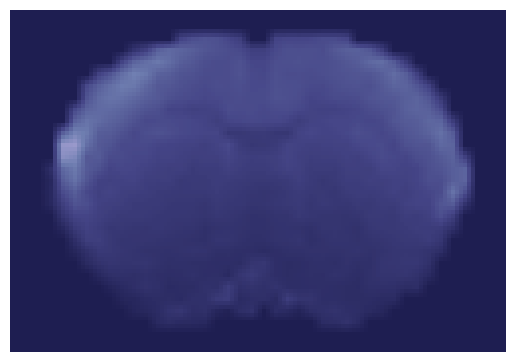

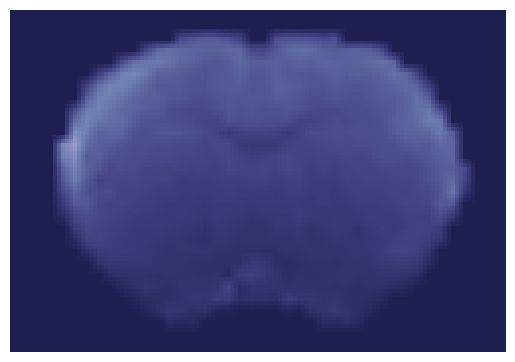

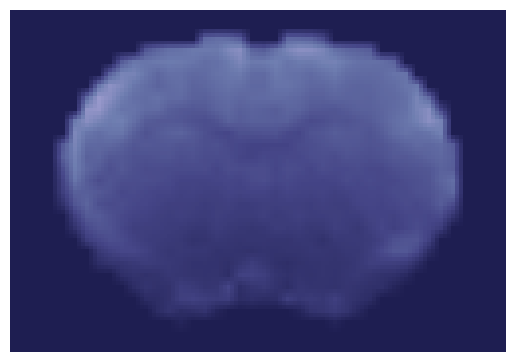

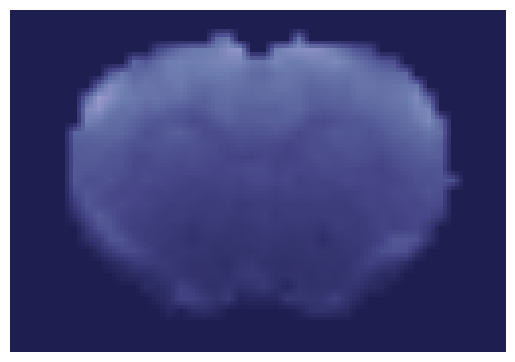

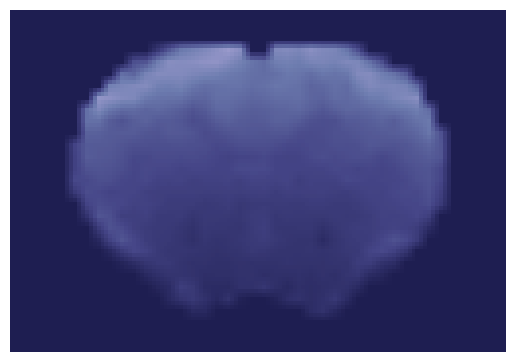

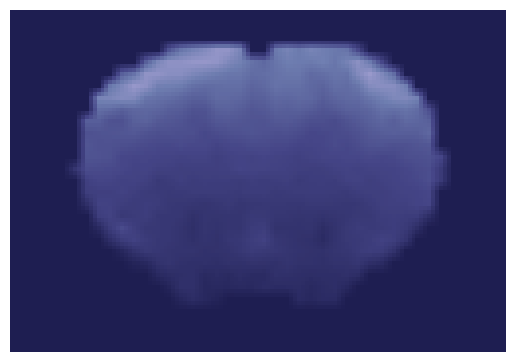

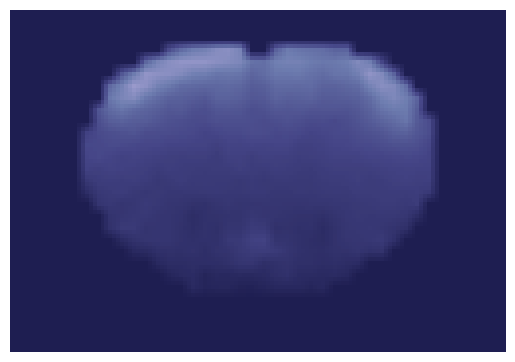

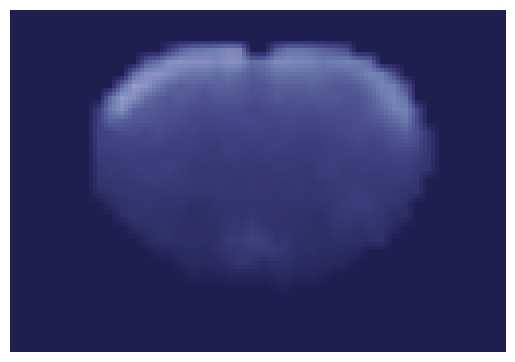

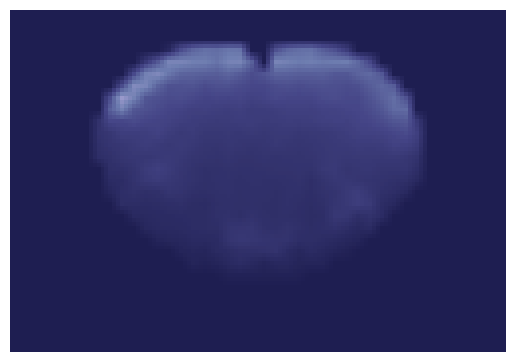

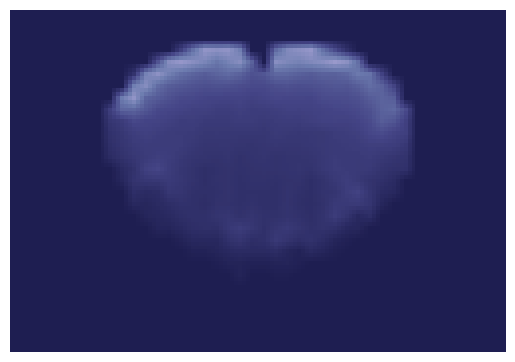

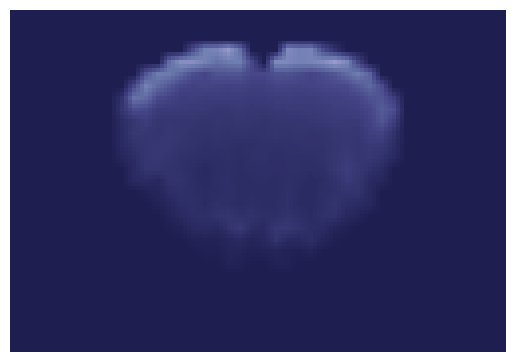

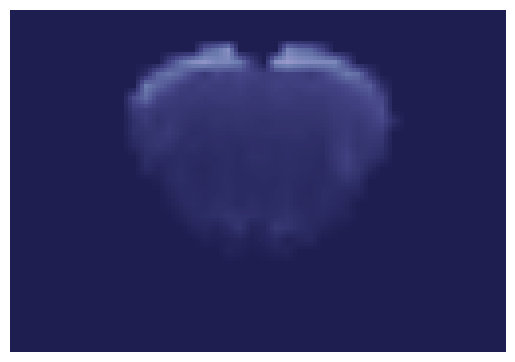

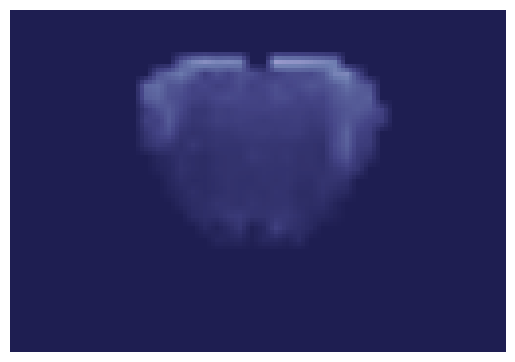

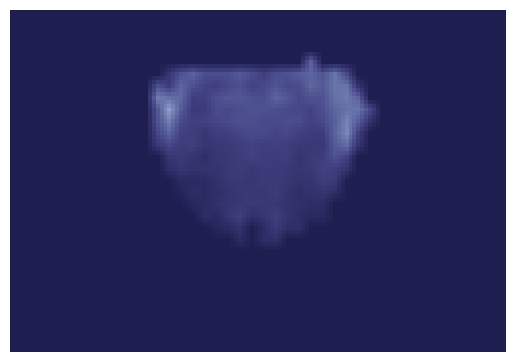

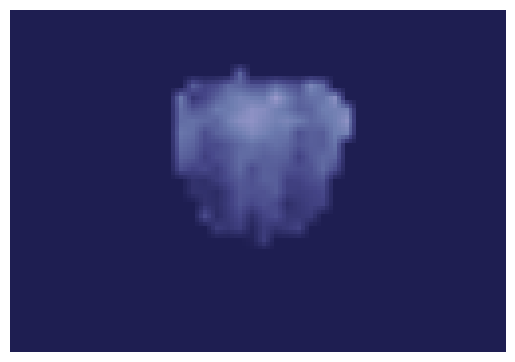

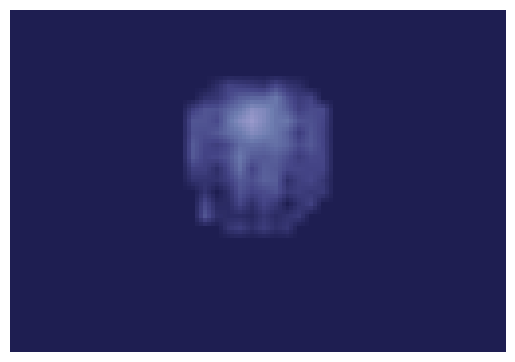

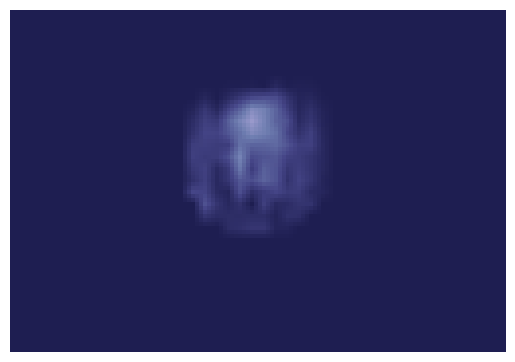

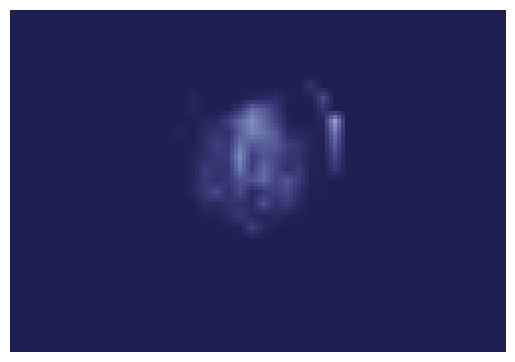

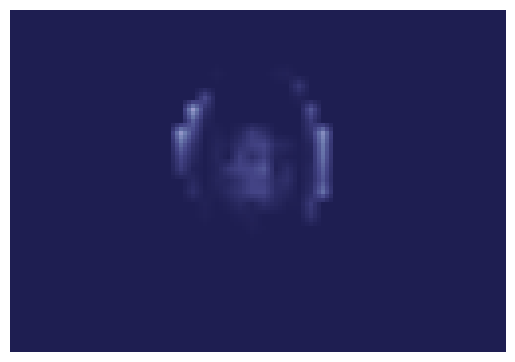

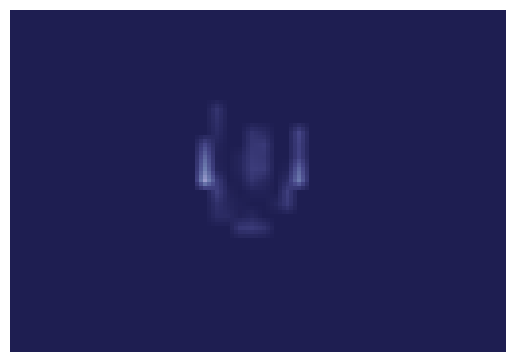

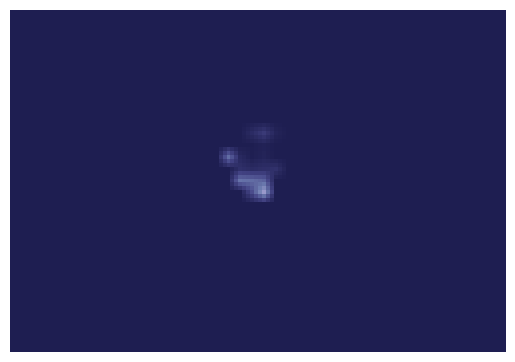

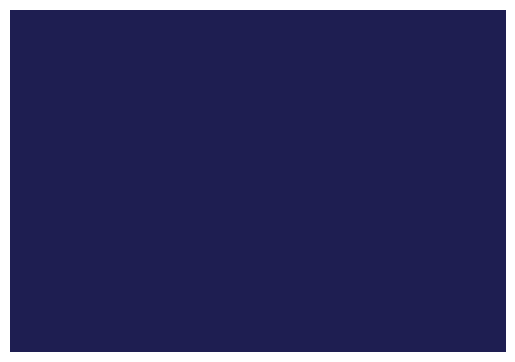

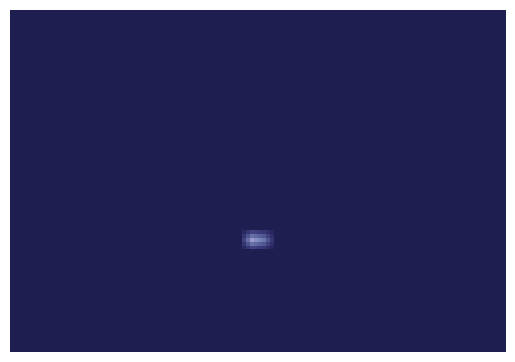

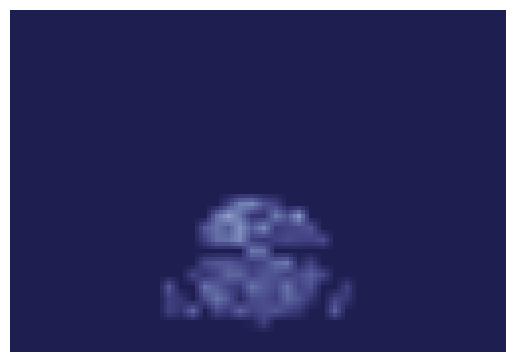

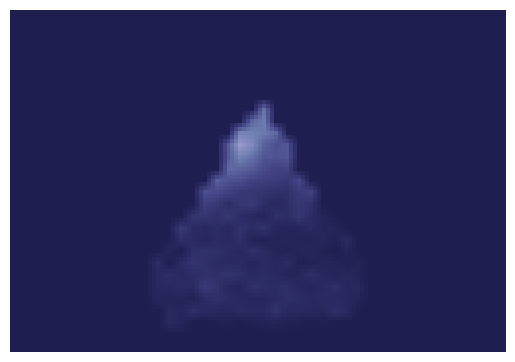

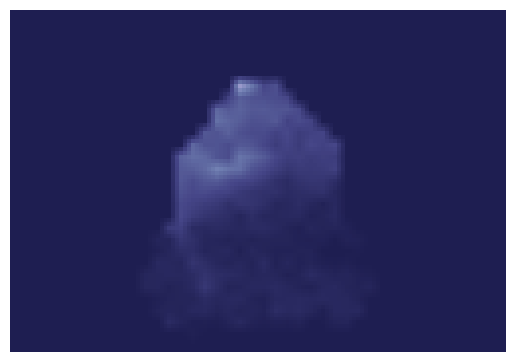

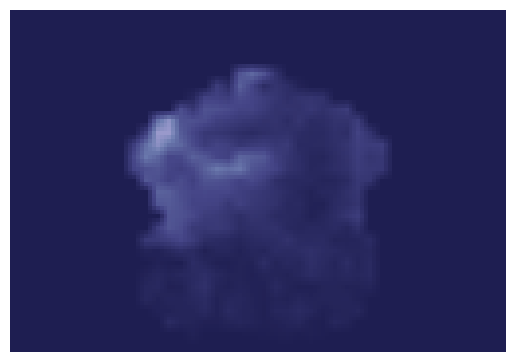

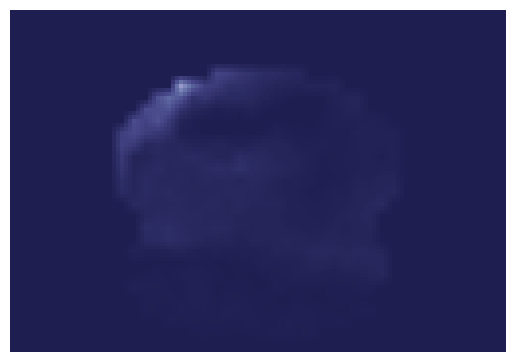

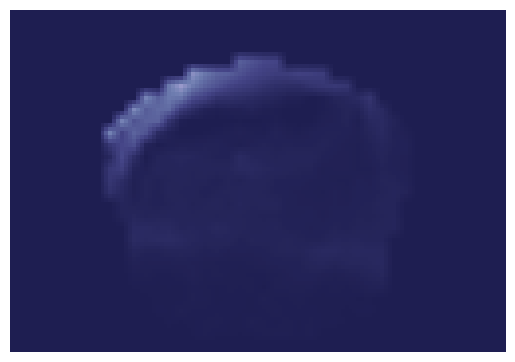

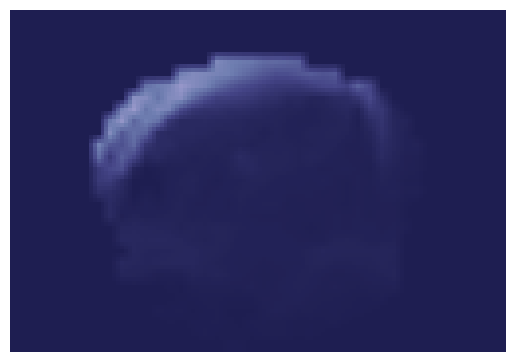

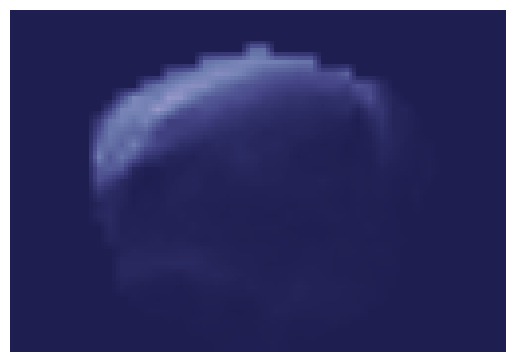

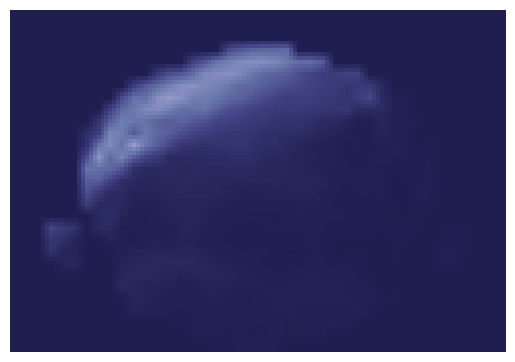

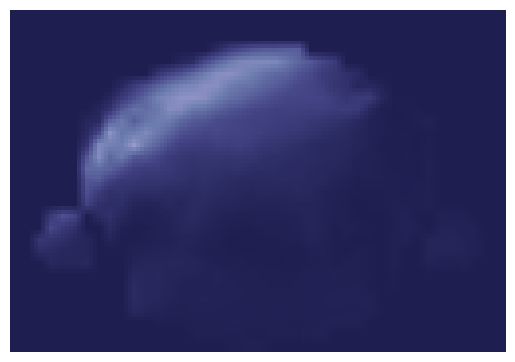

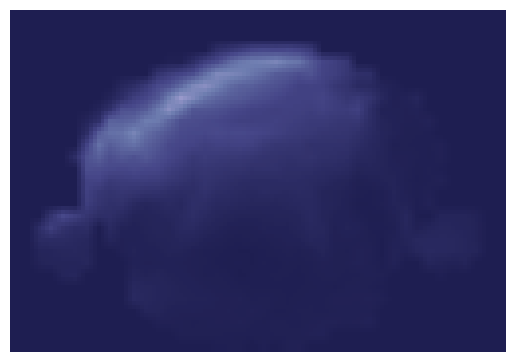

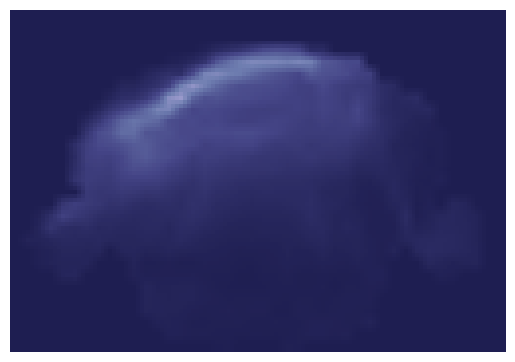

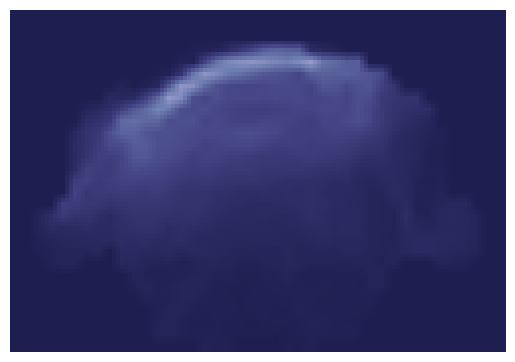

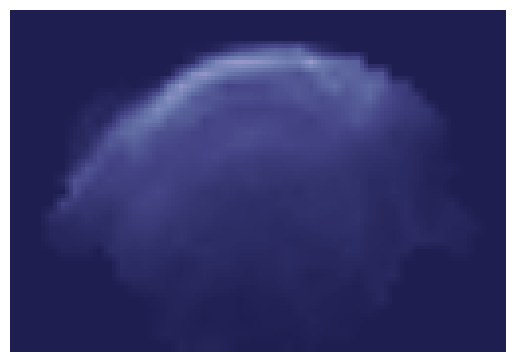

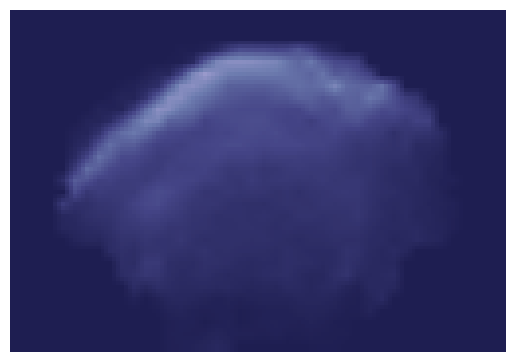

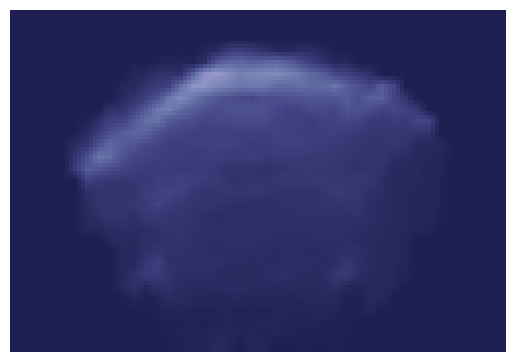

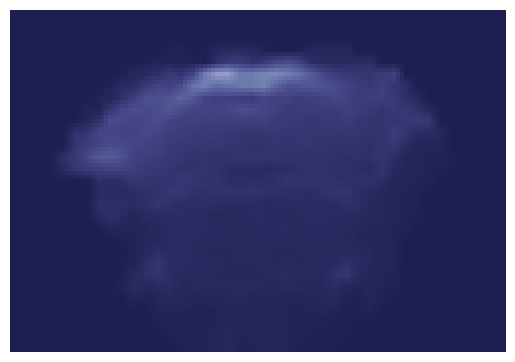

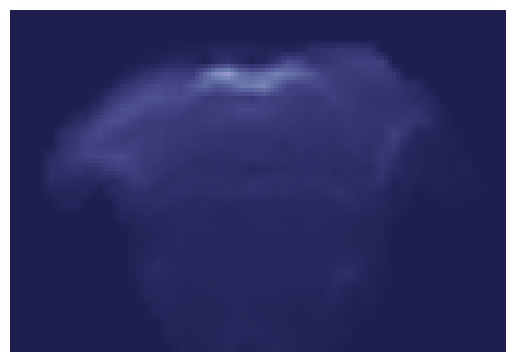

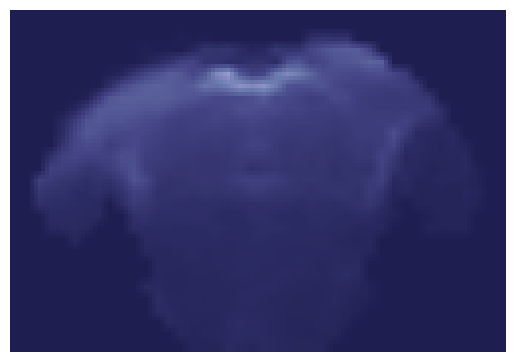

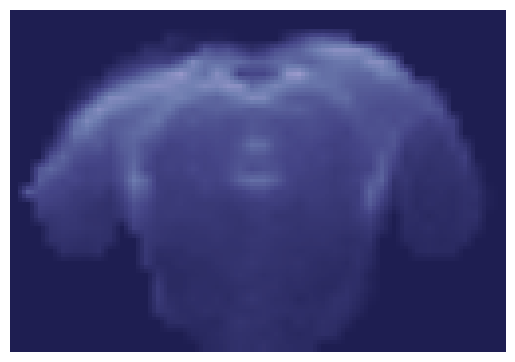

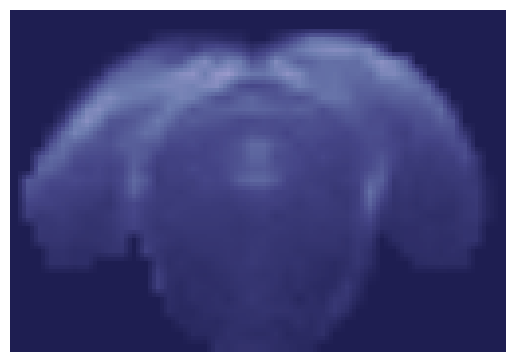

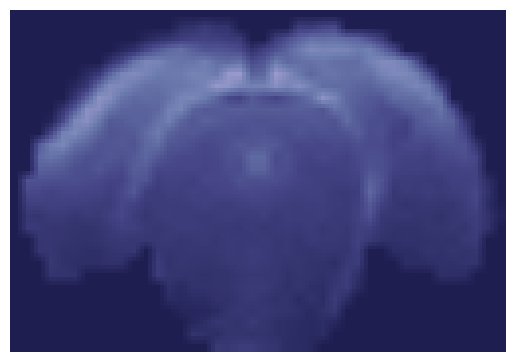

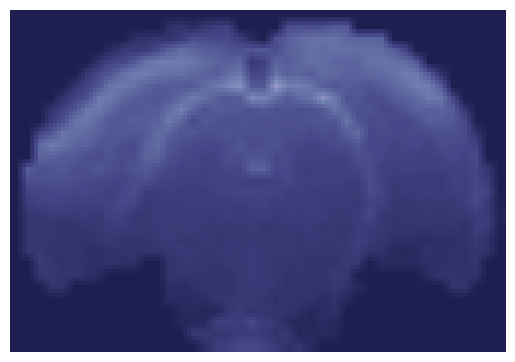

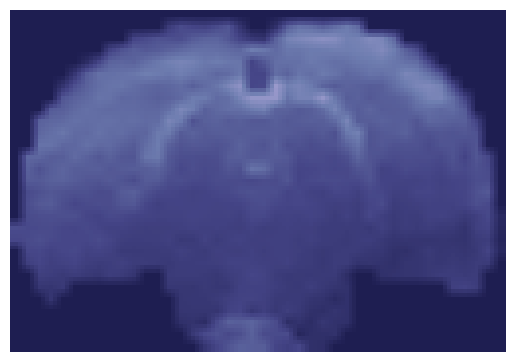

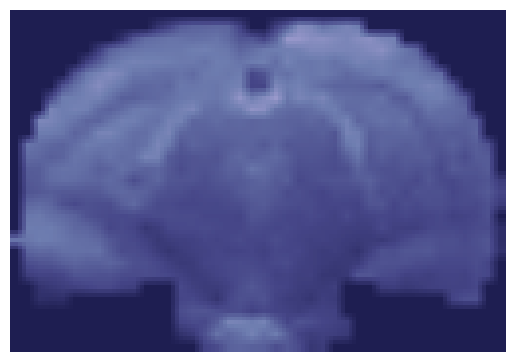

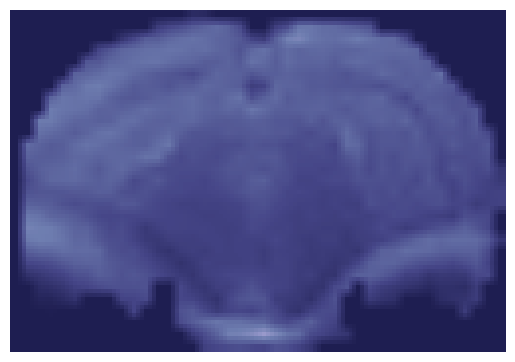

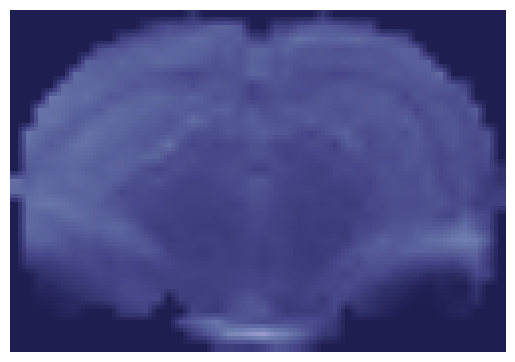

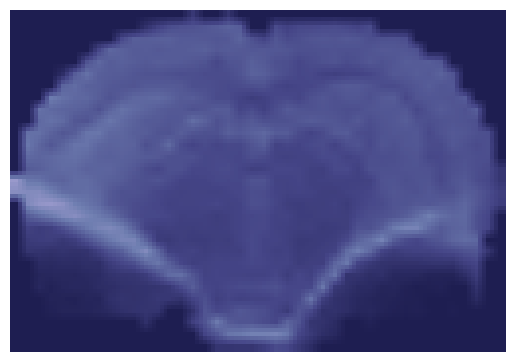

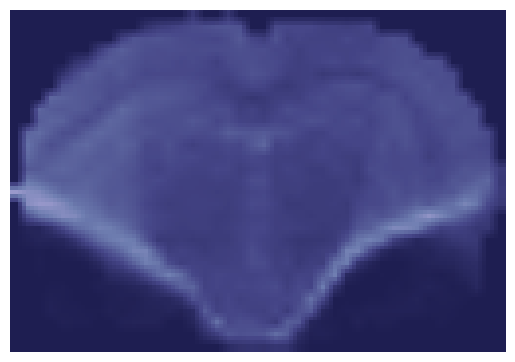

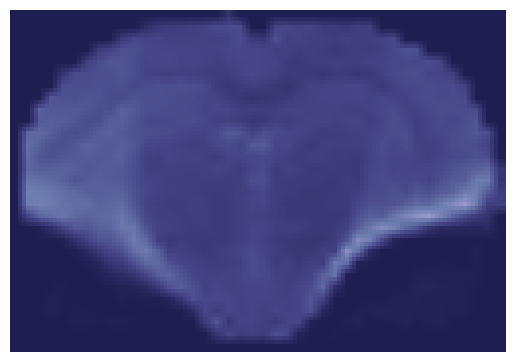

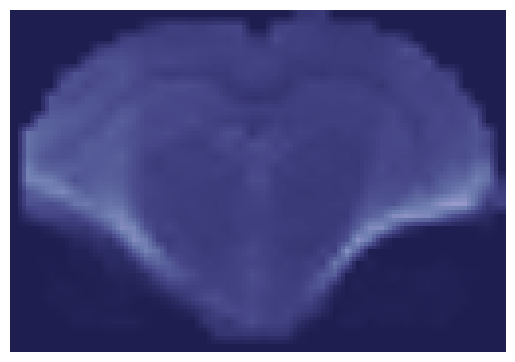

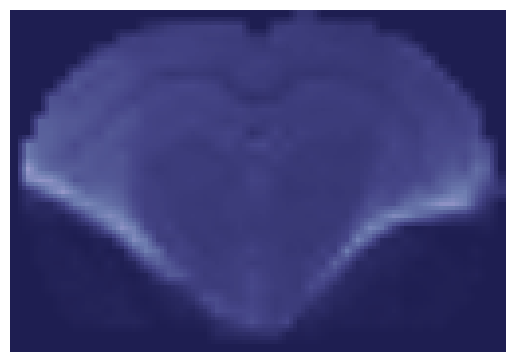

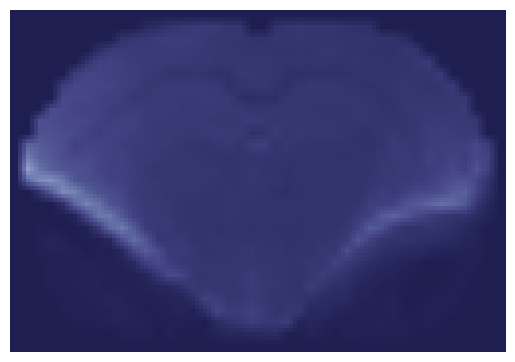

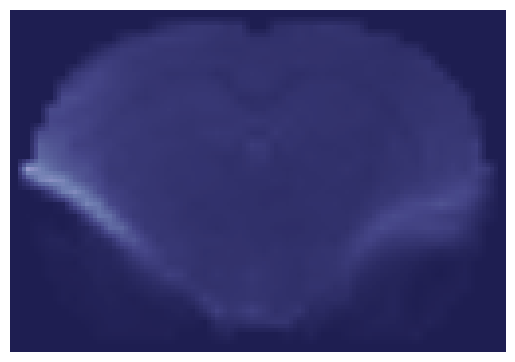

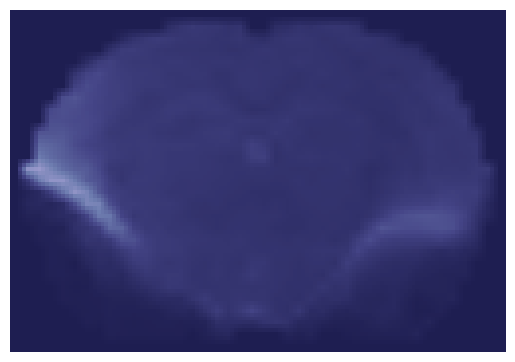

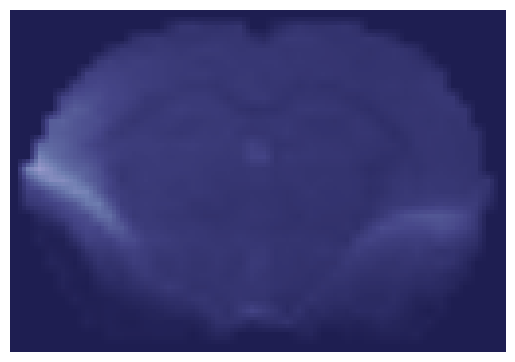

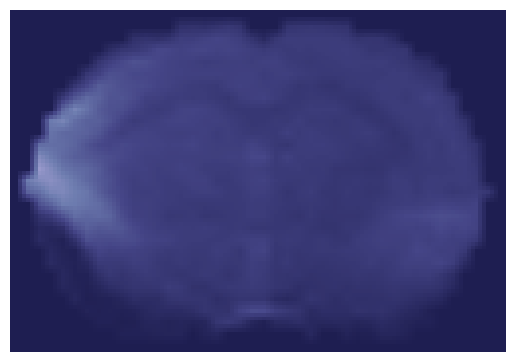

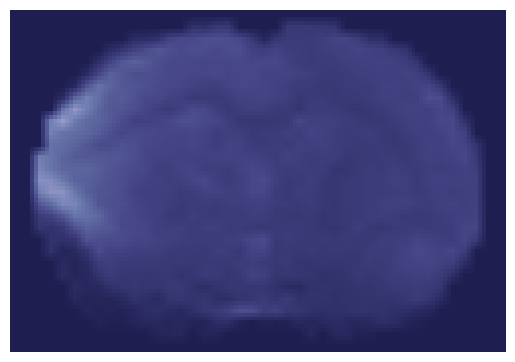

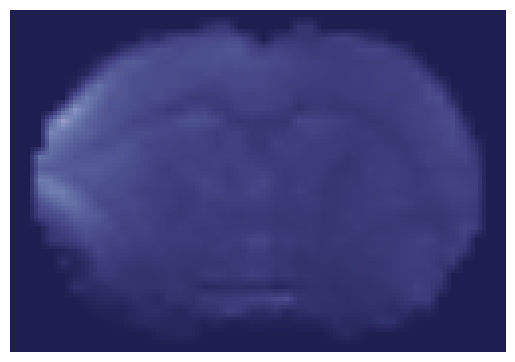

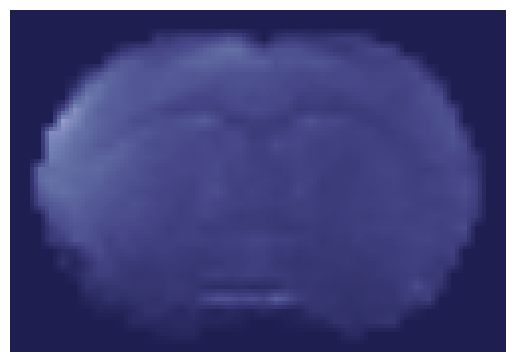

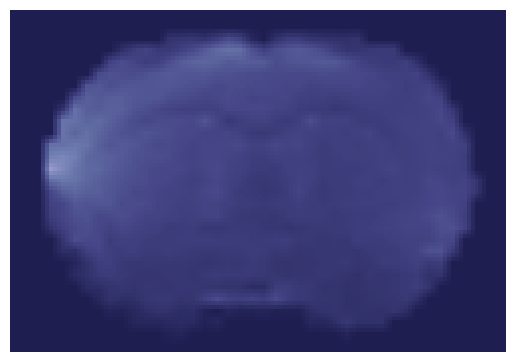

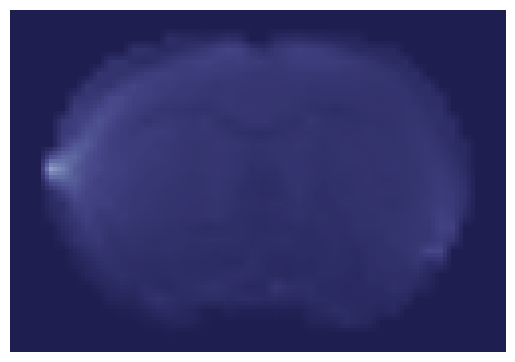

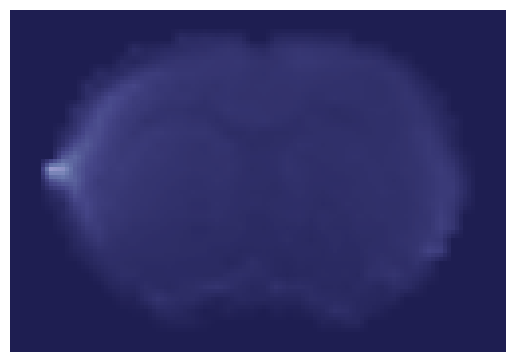

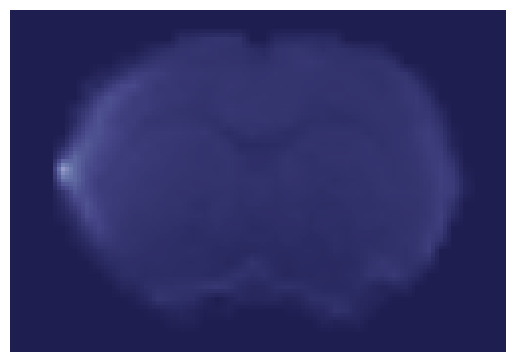

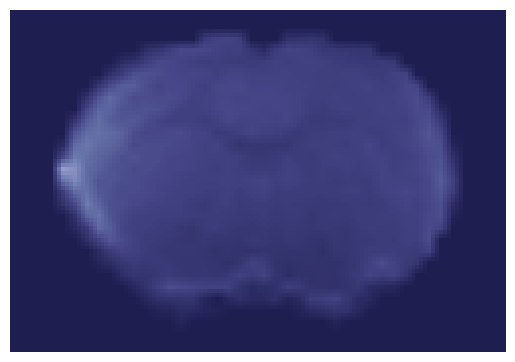

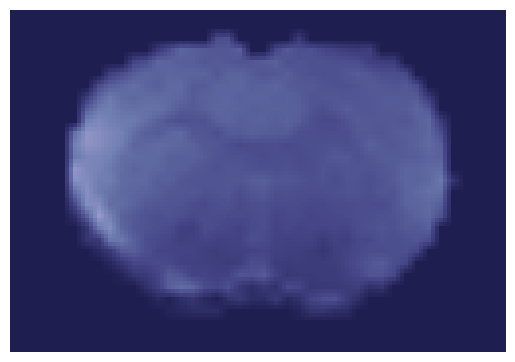

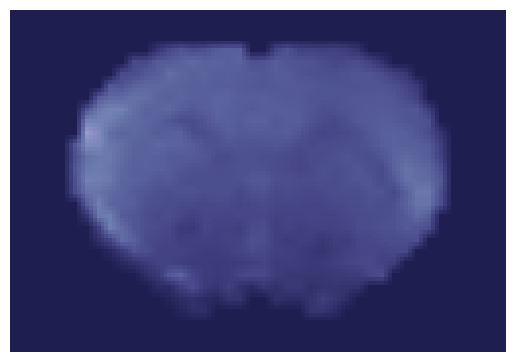

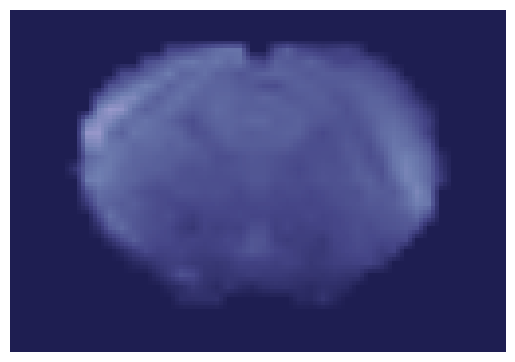

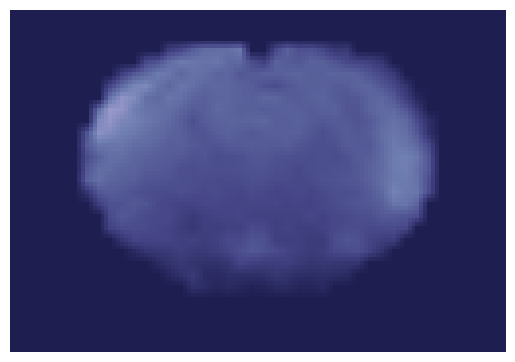

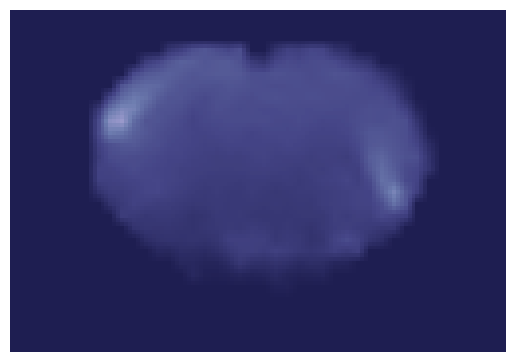

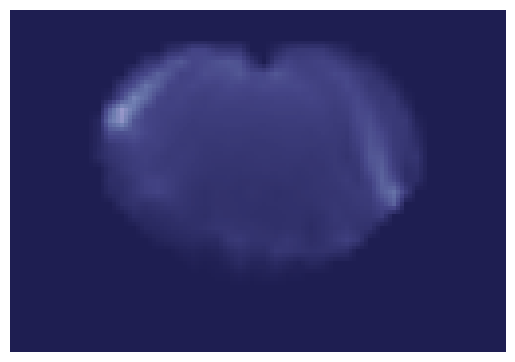

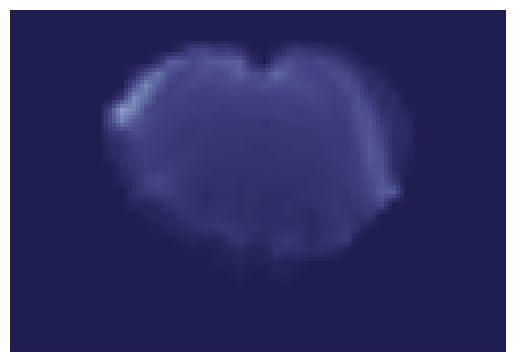

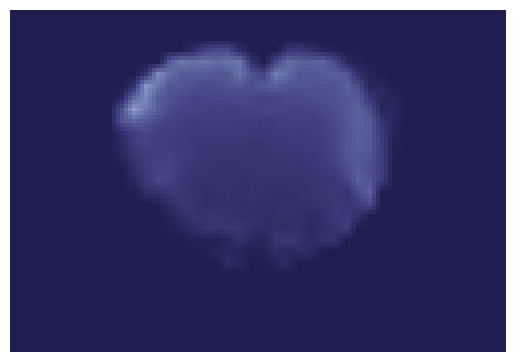

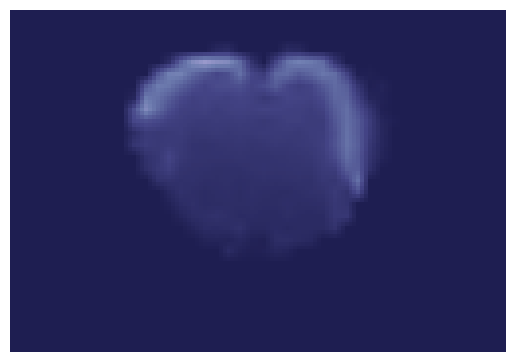

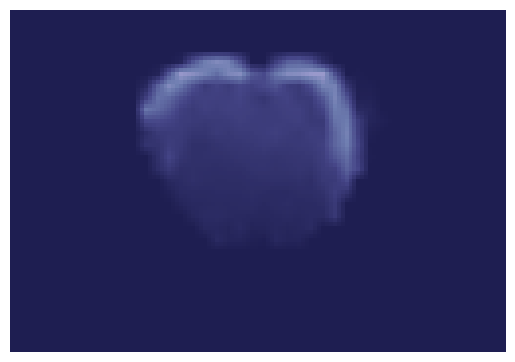

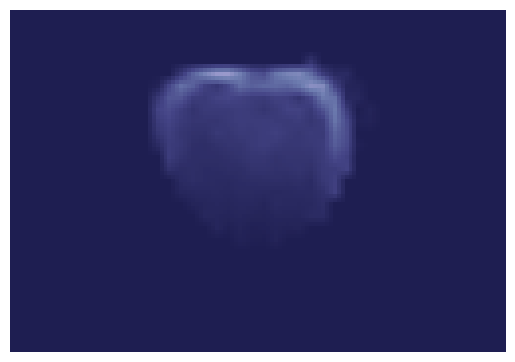

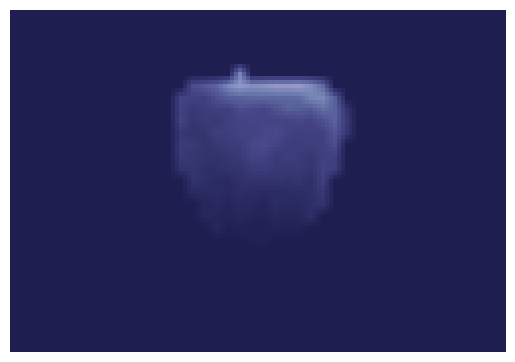

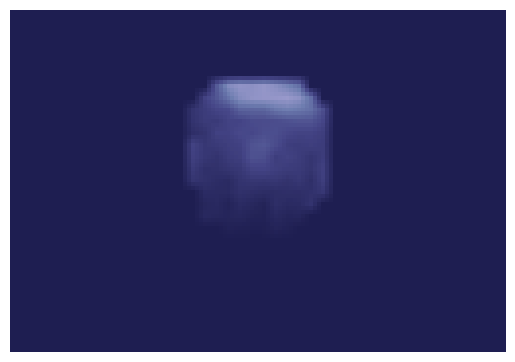

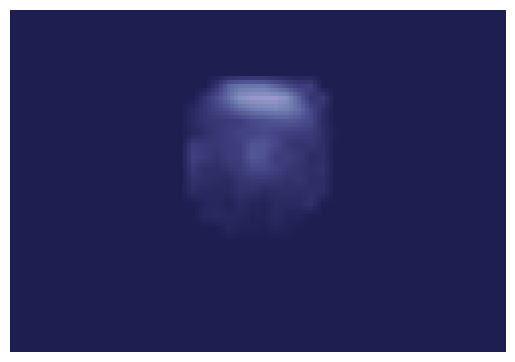

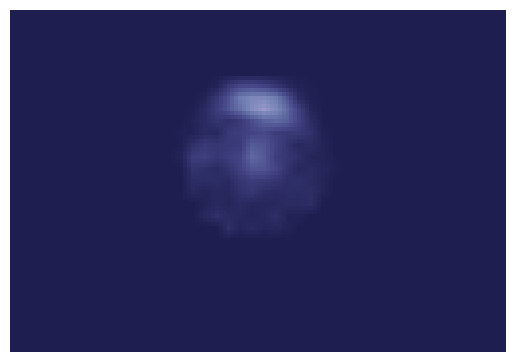

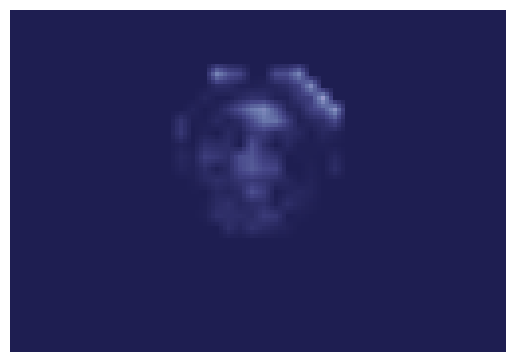

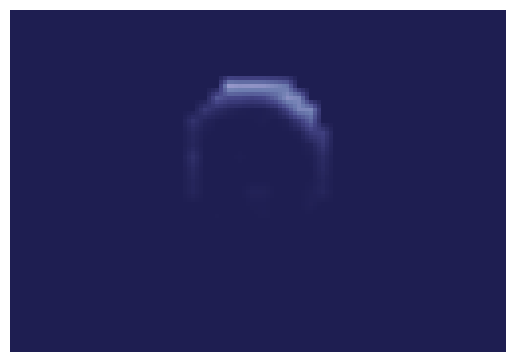

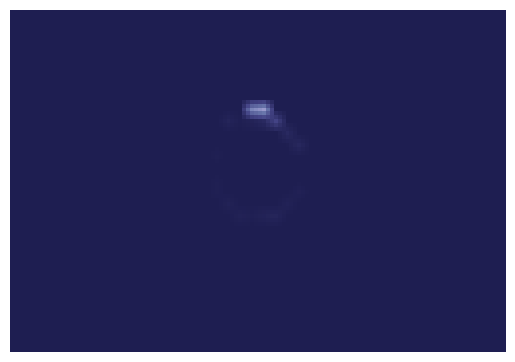

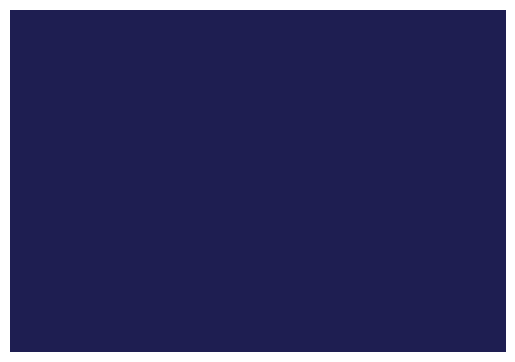

CM CNN


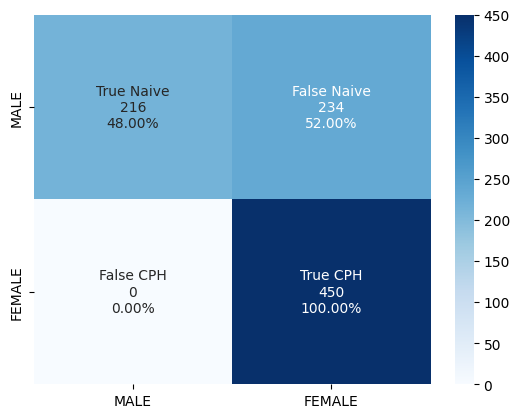

wandb: WARNING `format` argument was not provided, defaulting to `gif`. This parameter will be required in v0.20.0, please specify the format explicitly.
wandb: WARNING `format` argument was not provided, defaulting to `gif`. This parameter will be required in v0.20.0, please specify the format explicitly.
wandb: WARNING `format` argument was not provided, defaulting to `gif`. This parameter will be required in v0.20.0, please specify the format explicitly.
wandb: WARNING `format` argument was not provided, defaulting to `gif`. This parameter will be required in v0.20.0, please specify the format explicitly.


TypeError: grad_cam_per_frames() missing 1 required positional argument: 'threshold'

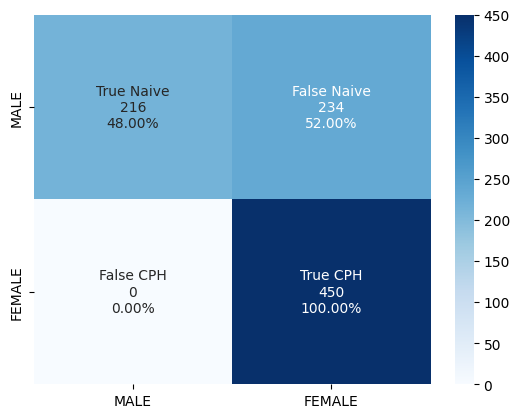

In [ ]:
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=1)

scores, histories = list(), list()
run = 1
for train_ix, test_ix in kfold.split(subjects, labels):
    print("Run #",run)
    if run == 1:
        # Set default values
        config_defaults = {
            "batch": 2,
        }
        
        # Initialize wandb with a sample project name
        wandb.init(project="FEMALE_Naive_vs_CPH(BLvsW7)", notes="No pooling. New data augmentation. Z-scoring per batch. Batch = 4. 10 epoch. Just z-scoring and applying RandomFlip. All layers gradcam. lr = 1e-5",
                   config=config_defaults)
    
        # Specify the other hyperparameters to the configuration.
        wandb.config.epochs = 3 #10
        wandb.config.sub_batch = 30
        wandb.config.sub_batch_ts = 30
        wandb.config.subjects = subjects
        wandb.config.architecture_name = "VGG16_3D"
        wandb.config.dataset_name = "NAIVE vs CPH(CPH[Bl-W1])"
        wandb.config.CNN_blocks = 5
        wandb.config.sessions = sessions
        wandb.config.vols_per_session_tr = 150 #570
        wandb.config.vols_per_session_ts = 150 #570
        wandb.config.initial_learning_rate = 1e-5
        #wandb.config.lr_decay_rate = 0.95
        wandb.config.optimizer = "Adam"
        
        sub_train = subjects[list(train_ix)]
        y_tr_all = labels[list(train_ix)]
        
        val_size = max(2, int(round(0.1 * len(sub_train))))
        
        sub_train, sub_val, y_train, y_val  = train_test_split(sub_train, labels[list(train_ix)], test_size=val_size, random_state=42, 
                                                          stratify=y_tr_all)
        sub_test = subjects[list(test_ix)]

        
        CPHclassTrain = FILES_and_LABELS(sub_train, sessions, MRI_type, functional_type)
        CPHclassTest = FILES_and_LABELS(sub_test, sessions, MRI_type, functional_type)
        CPHclassval = FILES_and_LABELS(sub_val, sessions, MRI_type, functional_type)
            
        X_train = CPHclassTrain.get_mask_and_bold()
        X_test = CPHclassTest.get_mask_and_bold()
        X_val = CPHclassval.get_mask_and_bold()

        wandb.config.batch = 4
    
        print("sub train:")
        print(np.array(X_train)[:,0])
        print("sub test:")
        print(np.array(X_test)[:,0])
        print("sub val:")
        print(np.array(X_val)[:,0])
    
        print("# sesiones Train",len(X_train))
        print("# sesiones Test",len(X_test))
        print("# sesiones Val",len(X_val))
        
        traingen = CustomDataGen(X_train, batch_size=wandb.config.batch, subbatch_size=wandb.config.sub_batch,
                                 format = "just_brain", vols = wandb.config.vols_per_session_tr,
                                 num_class = 2, classes = "CPHvsNAIVEfemale", augmentation = True)
        traingen.on_epoch_end()
        #Es necesario que la division entre X_test y batch_size tenga un modulo igual a 0. 
        #De otra manera el ultimo batch no lo utiliza al utilizar .predict
        testgen  = CustomDataGen(X_test, batch_size=1,subbatch_size=wandb.config.sub_batch_ts,
                                 format = "just_brain", vols= wandb.config.vols_per_session_ts,
                                 num_class = 2, classes = "CPHvsNAIVEfemale",shuffle=False)
        valgen  = CustomDataGen(X_val, batch_size=len(X_val),subbatch_size=30, format = "just_brain",vols=570, num_class = 2, classes = "CPHvsNAIVEfemale")
        
        #getting model 3D CNN
        #callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, min_delta=0.0001)
        print("Starting VGG 16 3D-----------------------------------------------------")
        tf.keras.backend.clear_session()
        gc.collect()
        CNN = VGG16_3D(3)
        set_pretrained_weigths(CNN)

        """
        lr_schedule = ExponentialDecay(wandb.config.initial_learning_rate,
                                       decay_steps=int((wandb.config.vols_per_session_tr/wandb.config.sub_batch)*len(X_train)),
                                       decay_rate=wandb.config.lr_decay_rate, staircase=True)
        """
        CNN.compile(loss=tf.nn.softmax_cross_entropy_with_logits, optimizer=tf.keras.optimizers.Adam(learning_rate=wandb.config.initial_learning_rate),
                        metrics=["Accuracy"])

        checkpoint_filepath = os.getcwd()+"/"+wandb.run.name
        #'/tmp/ckpt/MalevsFemale(CPH)_3D-VGG16_flips/'+wandb.run.name

        acc_loss_rate = CombineCallback()
        
        model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor='combine_metric', mode='max',
                                                                save_best_only=True)
        
        start_time = datetime.now()
        
        print("Training")
        
        history = CNN.fit(traingen, epochs=wandb.config.epochs, validation_data = valgen, shuffle=True,
                          callbacks=[WandbCallback(monitor='combine_metric',mode="max",save_model=(False)),acc_loss_rate,model_checkpoint_callback])
        
        end_time = datetime.now()
        print('Duration (CNN): {}'.format(end_time - start_time))

        print("Evaluating best epoch")
        CNN.load_weights(checkpoint_filepath)
        CNN.compile(loss=tf.nn.softmax_cross_entropy_with_logits, optimizer=tf.keras.optimizers.Adam(learning_rate=wandb.config.initial_learning_rate),
                        metrics=["Accuracy"])
        _,acc = CNN.evaluate(testgen, verbose=1)

        y_test=[]
        x_vols = []
        for i in range(int(len(X_test)*(wandb.config.vols_per_session_ts/wandb.config.sub_batch_ts))):
            x,y = testgen[i]
            y_test.extend(y)
            x_vols.extend(x)
        y_test = np.argmax(y_test, axis=1)
    
        
        print("predicts CNN")
        preds = tf.cast(tf.argmax(CNN.predict(testgen), axis=1), tf.int32)

        #Wrong predicted subjects
        wrong_labeled_subj = mislabeled_subj(y_test, preds, X_test, wandb.config.vols_per_session_ts)

        print("mislabeled subjects:\n",wrong_labeled_subj)
        
        scores.append(acc)
        histories.append(history)

        #GradCam
        #Naive
        if not os.path.exists(os.getcwd()+"/"+wandb.run.name+"/Naive"): 
            # if the demo_folder directory is not present  
            # then create it. 
            os.makedirs(os.getcwd()+"/"+wandb.run.name+"/Naive")
        #CPH
        if not os.path.exists(os.getcwd()+"/"+wandb.run.name+"/CPH"): 
            # if the demo_folder directory is not present  
            # then create it. 
            os.makedirs(os.getcwd()+"/"+wandb.run.name+"/CPH")

        all_layers = [layer.name for layer in reversed(CNN.layers) if len(layer.output_shape) == 5 and (layer.__class__.__name__ == 'ReLU' or isinstance(layer, tf.keras.layers.Conv3D))]
        
        index_naive = index_for_gradcam(0,y_test,preds)
        index_cph = index_for_gradcam(1,y_test,preds)
        
        if index_naive is not None and index_cph is not None:

            heatmap_naive = make_gradcam_heatmap(np.expand_dims(x_vols[index_naive], axis=0), CNN, all_layers[0])
            heatmap_cph = make_gradcam_heatmap(np.expand_dims(x_vols[index_cph], axis=0), CNN, all_layers[0])

            resized_heatmap_naive = get_resized_heatmap(heatmap_naive, np.shape(x_vols[index_naive]))
            resized_heatmap_cph = get_resized_heatmap(heatmap_cph, np.shape(x_vols[index_cph]))

            gradcam_naive = create_animation(x_vols[index_naive], 'Naive', heatmap=resized_heatmap_naive)
            gradcam_cph = create_animation(x_vols[index_cph], 'CPH', heatmap=resized_heatmap_cph)

            Writer = animation.writers['ffmpeg']
            writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

            name_ani_naive = os.getcwd()+"/"+wandb.run.name+"/Naive/"+"GradCam_Naive(BlVsW1-CPH).mp4"
            gradcam_naive.save(name_ani_naive, writer=writer)

            name_ani_CPH = os.getcwd()+"/"+wandb.run.name+"/CPH/"+"GradCam_CPH(BlVsW1-CPH).mp4"
            gradcam_cph.save(name_ani_CPH, writer=writer)
        


            #GradCam average all conv layers
            print("GradCam All ConvLayers")

            all_layers_gradcam_naive = fuse_layers(all_layers, CNN, x_vols, index_naive, emphasize=False)
            all_layers_gradcam_cph = fuse_layers(all_layers, CNN, x_vols, index_cph, emphasize=False)

            all_layers_animation_naive = create_animation(x_vols[index_naive], 'all_layers_gradcam_Naive', heatmap=all_layers_gradcam_naive)
            all_layers_animation_cph = create_animation(x_vols[index_cph], 'all_layers_gradcam_CPH', heatmap=all_layers_gradcam_cph)

            name_all_naive = os.getcwd()+"/"+wandb.run.name+"/Naive/"+'all_layers_gradcam_Naive.mp4'
            all_layers_animation_naive.save(name_all_naive, writer=writer)
            
            name_all_cph = os.getcwd()+"/"+wandb.run.name+"/CPH/"+'all_layers_gradcam_CPH.mp4'
            all_layers_animation_cph.save(name_all_cph, writer=writer)

        #Save frame by frame of gradcam        
        for i in range(len(x_vols[index_cph][0,:,0])):
            plt.imshow(cv2.resize(np.rot90(np.array(x_vols[index_cph])[:,i,:]),dsize=(126,87)), alpha=0.8, cmap='bone')
            # over the cam output
            plt.imshow(cv2.resize(np.rot90(resized_heatmap_cph[:,i,:]),dsize=(126,87)), alpha=0.4,cmap='jet')
            plt.axis('off')
            # display the image
            
            name = str(i)+".png" 
            plt.savefig(os.getcwd()+"/"+wandb.run.name+"/CPH/"+name)
            plt.show()

        np.save(os.getcwd()+"/"+wandb.run.name+"/CPH/Array_GradCam-CPH", resized_heatmap_cph)
                
        for i in range(len(x_vols[index_cph][0,:,0])):
            plt.imshow(cv2.resize(np.rot90(np.array(x_vols[index_naive])[:,i,:]),dsize=(126,87)), alpha=0.8, cmap='bone')
            # over the cam output
            plt.imshow(cv2.resize(np.rot90(resized_heatmap_naive[:,i,:]),dsize=(126,87)), alpha=0.4,cmap='jet')
            plt.axis('off')
            # display the image
            name = str(i)+".png" 
            plt.savefig(os.getcwd()+"/"+wandb.run.name+"/Naive/"+name)
            plt.show()

        np.save(os.getcwd()+"/"+wandb.run.name+"/Naive/Array_GradCam-Naive", resized_heatmap_naive)

        print("CM CNN")
        cm = confusionmatrix(y_test, preds)
    
        wandb.log({'test_acc': float(acc),
                   'time_running': '{}'.format(end_time - start_time),
                   'confution_matrix': wandb.Image(cm),
                   'mislabeled_subj':wrong_labeled_subj,
                   'GradCam_Naive-coronal': wandb.Video(name_ani_naive),
                   'GradCam-CPH-coronal': wandb.Video(name_ani_CPH),
                   'GradCam_Naive_all-layers': wandb.Video(name_all_naive),
                   'GradCam-CPH_all-layers': wandb.Video(name_all_cph),
                   'GradCam-per_frames-Naive': wandb.Image(grad_cam_per_frames(x_vols[index_naive],resized_heatmap_naive, threshold=0.6)),
                   'GradCam-per_frames-CPH': wandb.Image(grad_cam_per_frames(x_vols[index_cph],resized_heatmap_cph))})
        
        break
    run = run + 1
        
print("histories and scores from VGG 16 M2D") 
summarize_diagnostics(histories)
summarize_performance(scores)

wandb.finish()
        

max 193.5
min 0.0


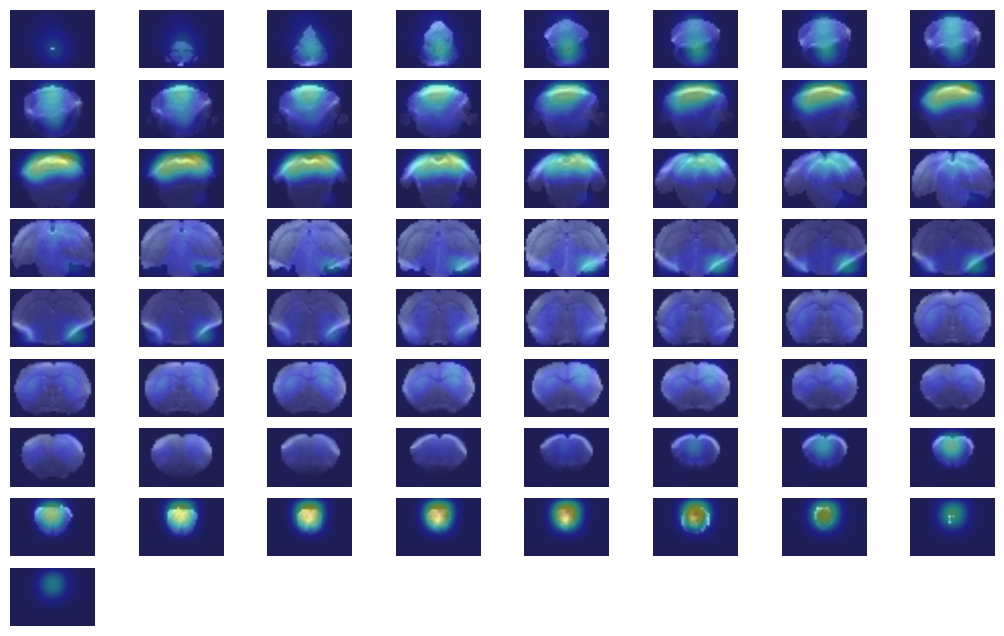

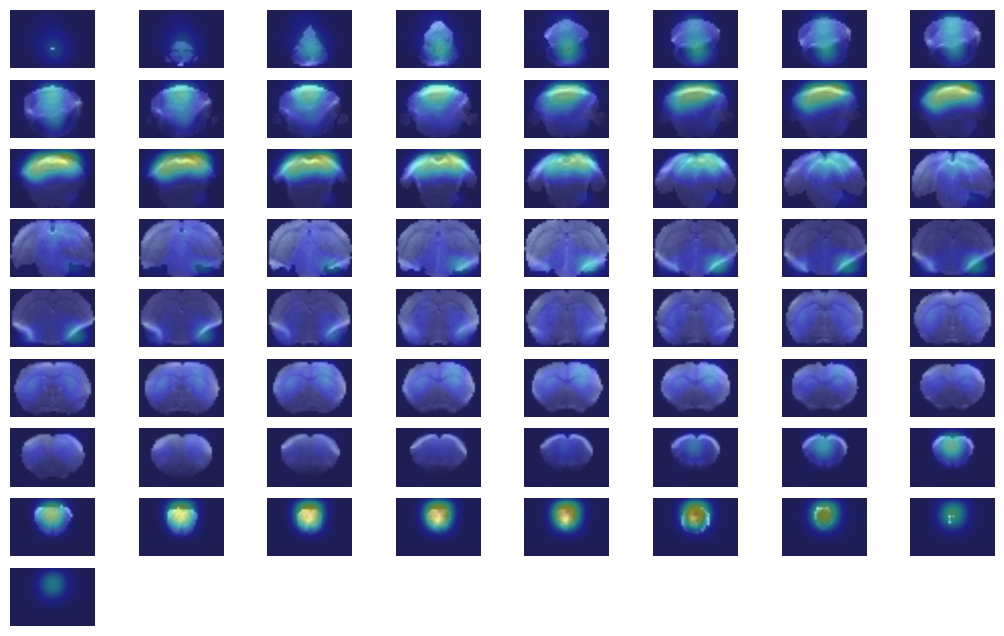

In [9]:
path1_male = "C:/Users/gdaalumno/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/PainClassifier/Transfer Learning/VGG 16/FEMALE_Naive_vs_CPH(BLvsW7)/northern-spaceship-9/Naive/Array_GradCam-Naive.npy"
path2_male = "C:/Users/gdaalumno/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/PainClassifier/Transfer Learning/VGG 16/FEMALE_Naive_vs_CPH(BLvsW7)/divine-microwave-10/Naive/Array_GradCam-Naive.npy"
path3_male = "C:/Users/gdaalumno/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/PainClassifier/Transfer Learning/VGG 16/FEMALE_Naive_vs_CPH(BLvsW7)/deep-smoke-11/Naive/Array_GradCam-Naive.npy"
path4_male = "C:/Users/gdaalumno/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/PainClassifier/Transfer Learning/VGG 16/FEMALE_Naive_vs_CPH(BLvsW7)/vague-forest-12/Naive/Array_GradCam-Naive.npy"

cam1 = np.load(path1_male)
cam2 = np.load(path2_male)
cam3 = np.load(path3_male)
cam4 = np.load(path4_male)

avgcam = np.mean(np.array([cam1,
                           cam2,
                           cam3,
                           cam4]),axis=0)

print("max",avgcam.max())
print("min",avgcam.min())

MRI_type = "func"
functional_type = "rest"
CPHclassTrain = FILES_and_LABELS([82], [1], MRI_type, functional_type)

X_train = CPHclassTrain.get_mask_and_bold()
traingen = CustomDataGen(X_train, batch_size=1, subbatch_size=30,
                                 format = "just_brain", vols = 570,
                                 num_class = 2, classes = "sex")

x,y = traingen[0]

grad_cam_per_frames(x[25],avgcam,0)

max 186.5
min 0.5


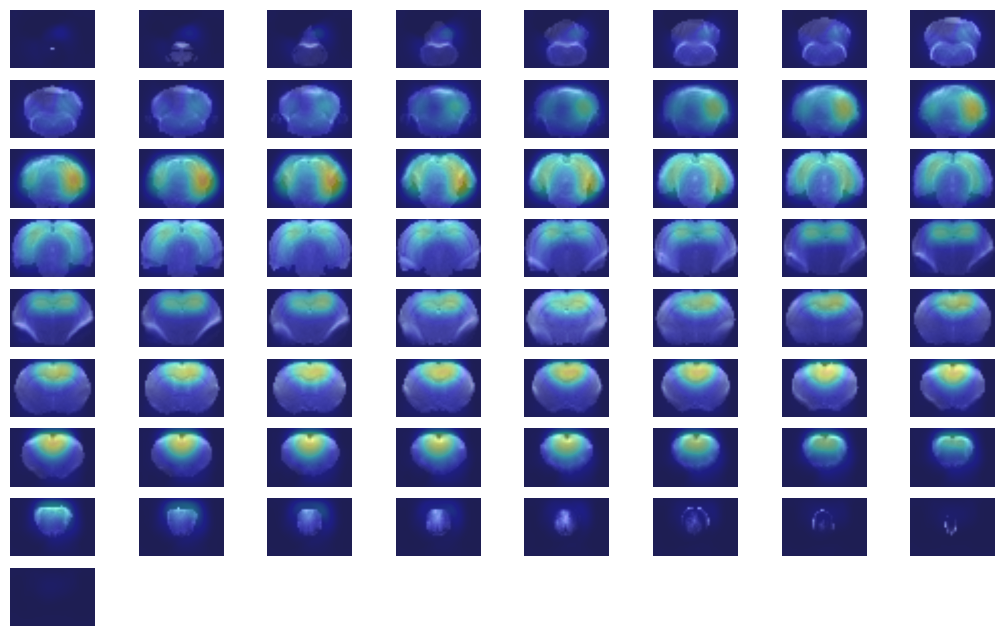

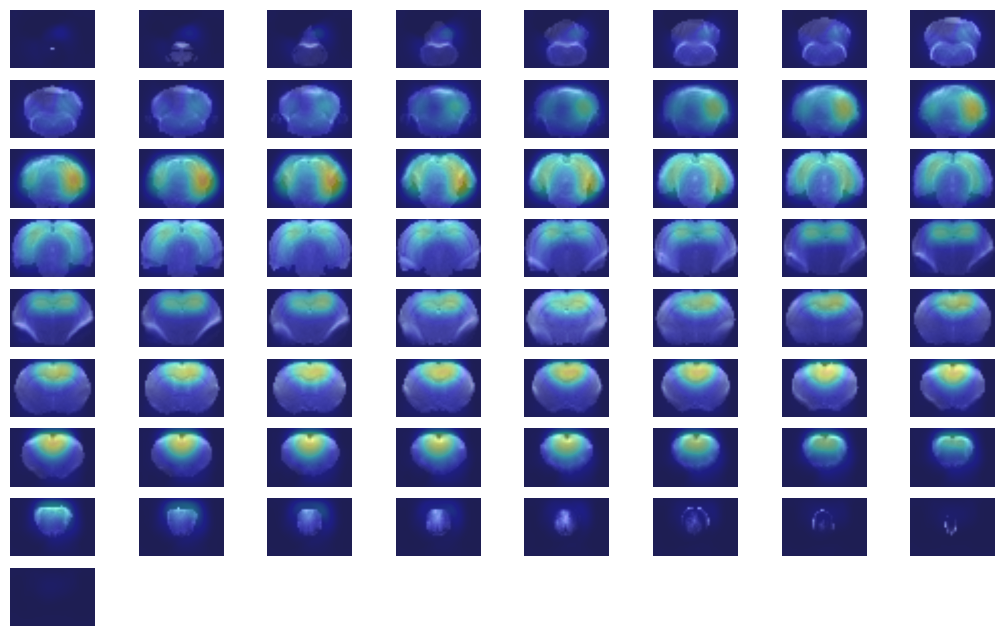

wandb: While tearing down the service manager. The following error has occurred: [WinError 10054] Se ha forzado la interrupción de una conexión existente por el host remoto


In [10]:
path1_male = "C:/Users/gdaalumno/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/PainClassifier/Transfer Learning/VGG 16/FEMALE_Naive_vs_CPH(BLvsW7)/northern-spaceship-9/CPH/Array_GradCam-CPH.npy"
path2_male = "C:/Users/gdaalumno/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/PainClassifier/Transfer Learning/VGG 16/FEMALE_Naive_vs_CPH(BLvsW7)/divine-microwave-10/CPH/Array_GradCam-CPH.npy"
path3_male = "C:/Users/gdaalumno/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/PainClassifier/Transfer Learning/VGG 16/FEMALE_Naive_vs_CPH(BLvsW7)/deep-smoke-11/CPH/Array_GradCam-CPH.npy"
path4_male = "C:/Users/gdaalumno/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/PainClassifier/Transfer Learning/VGG 16/FEMALE_Naive_vs_CPH(BLvsW7)/vague-forest-12/CPH/Array_GradCam-CPH.npy"

cam1 = np.load(path1_male)
cam2 = np.load(path2_male)
cam3 = np.load(path3_male)
cam4 = np.load(path4_male)

avgcam = np.mean(np.array([cam1,
                           cam2,
                           cam3,
                           cam4]),axis=0)

print("max",avgcam.max())
print("min",avgcam.min())

MRI_type = "func"
functional_type = "rest"
CPHclassTrain = FILES_and_LABELS([82], [3], MRI_type, functional_type)

X_train = CPHclassTrain.get_mask_and_bold()
traingen = CustomDataGen(X_train, batch_size=1, subbatch_size=30,
                                 format = "just_brain", vols = 570,
                                 num_class = 2, classes = "sex")

x,y = traingen[0]

grad_cam_per_frames(x[25],avgcam,0)